In [1]:
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
# PyTorch related imports would go here
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
#from us import states
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#DATASET_NAME = "PM_AE6_v5.3_v10182024.csv"
#DATASET_NAME = "SpeciateV5.3_PM_All_Combustion_woMobile.csv"
#DATASET_NAME = "SpeciateV5.3_PM_All.csv"
#df = pd.read_csv('/content/drive/MyDrive/usepa_speciate_V1/'+DATASET_NAME, encoding='ISO-8859-1')

In [135]:
DATASET_NAME = "PMProfiles_2000_2004_v12312024.csv"
df = pd.read_csv('/content/drive/MyDrive/usepa_speciate_V1/'+DATASET_NAME, encoding='ISO-8859-1')

In [136]:
columns_to_normalize = df.columns[6:-1]
df[columns_to_normalize] = df[columns_to_normalize].div(df[df.columns[-1]], axis=0)*100

In [137]:
normalized_sums = df[columns_to_normalize].sum(axis=1)
print(normalized_sums)

0      100.0
1      100.0
2      100.0
3      100.0
4      100.0
       ...  
541    100.0
542    100.0
543    100.0
544    100.0
545    100.0
Length: 546, dtype: float64


In [ ]:
#df = df.pivot_table(index=['PROFILE_CODE', 'PROFILE_NAME'], columns='SPECIES_NAME', values='WEIGHT_PERCENT', aggfunc='first').reset_index()
# Fill NaN values with 0 (or any other value you prefer)
#df = df.fillna(0)

In [ ]:
##columns_to_remove = ['Organic carbon I', 'Organic carbon II','Organic carbon III','Organic carbon IV','Elemental carbon I','Elemental carbon II','Elemental carbon III','Antimony','Bromine','Cadmium','Chlorine','Cobalt','Magnesium ion','Manganese','Mercury','Molybdenum','Selenium','Tin','Zirconium']
#, 'Phosphate'
# Remove the selected columns
#df = df.drop(columns=columns_to_remove)

In [138]:
# def clean_text(text):
#     # Remove numbers and special characters
#     text = re.sub(r'[^A-Za-z\s]', ' ', text)
#     # Convert to lowercase
#     text = text.lower()
#     # Remove stopwords
#     text = ' '.join(word for word in text.split() if word not in stop_words)
#     return text

In [ ]:
#df['OC/EC']=df['Organic carbon']/df['Elemental Carbon']
#df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [139]:
pivot_df = df.drop(columns=['PROFILE_CODE', 'PROFILE_NAME','SCC1','SCC2','SCC3','Saritha_Saikat_Assigned','Total'])


In [86]:
pivot_df

Aluminum  Ammonium  Antimony   Arsenic    Barium  Bromine   Cadmium  \
0         NaN  0.916182       NaN       NaN       NaN      NaN       NaN   
1    1.087395  9.327873       NaN       NaN       NaN      NaN       NaN   
2    0.106169  3.070012       NaN       NaN       NaN      NaN       NaN   
3    0.071989  0.439693       NaN       NaN       NaN      NaN       NaN   
4    0.145588       NaN       NaN       NaN       NaN      NaN       NaN   
..        ...       ...       ...       ...       ...      ...       ...   
541       NaN       NaN  0.001710  0.000111  0.001407      NaN  0.006576   
542       NaN       NaN  0.011077  0.000005  0.000424      NaN  0.006078   
543  0.000356       NaN  0.000727  0.000006  0.001033      NaN  0.002392   
544  0.000150       NaN  0.006705  0.000006  0.000681      NaN  0.004521   
545       NaN  2.272072       NaN       NaN       NaN      NaN       NaN   

      Calcium  Cerium  Cesium  ...    Sulfate  Sulfur  Thallium       Tin  \
0    0.824706     NaN     NaN  ...   2.010464     NaN       NaN       NaN   
1    4.843774     NaN     NaN  ...  24.124476     NaN       NaN       NaN   
2    1.030789     NaN     NaN  ...   9.295222     NaN       NaN       NaN   
3    0.426608     NaN     NaN  ...   1.263894     NaN       NaN       NaN   
4    0.648903     NaN     NaN  ...  82.764549     NaN       NaN       NaN   
..        ...     ...     ...  ...        ...     ...       ...       ...   
541  0.056423     NaN     NaN  ...   0.419029     NaN       NaN  0.010324   
542  0.024332     NaN     NaN  ...   1.930824     NaN       NaN  0.008343   
543  0.043326     NaN     NaN  ...   0.360214     NaN       NaN  0.001163   
544  0.032356     NaN     NaN  ...   1.267329     NaN       NaN  0.005310   
545       NaN     NaN     NaN  ...   3.495495     NaN       NaN       NaN   

     Titanium  Uranium  Vanadium  Yttrium      Zinc  Zirconium  
0         NaN      NaN       NaN      NaN  0.166858        NaN  
1    0.114311      NaN       NaN      NaN  1.989758        NaN  
2    0.016430      NaN       NaN      NaN       NaN        NaN  
3    0.010656      NaN       NaN      NaN       NaN        NaN  
4    0.022651      NaN       NaN      NaN       NaN        NaN  
..        ...      ...       ...      ...       ...        ...  
541  0.001492      NaN  0.000155      NaN  0.045598   0.000930  
542  0.000062      NaN  0.000315      NaN  0.186215   0.000198  
543  0.000394      NaN  0.000060      NaN  0.032198   0.000268  
544  0.000202      NaN  0.000207      NaN  0.121151   0.000228  
545       NaN      NaN       NaN      NaN       NaN        NaN  

[546 rows x 57 columns]

In [140]:
nSpecies =pivot_df.shape[1]
nSpecies

57

In [ ]:
#pivot_df = df
#description = df.describe()
#pivot_df.describe()
#pivot_df.to_csv('AE6_pivot.csv')
# Write to CSV file
#description.to_csv('description.csv')

In [141]:
def assign_cluster_name(cluster):
    names = pivot_df[pivot_df['speciated_cluster'] == cluster]['PROFILE_NAME']
    most_common_name = Counter(names).most_common(1)[0][0]
    return most_common_name

In [142]:
#X = pivot_df.iloc[:, 2:49]
X = pivot_df

In [ ]:
X

In [22]:
from sklearn.neighbors import NearestNeighbors
import networkx as nx
from scipy.sparse.linalg import svds

In [143]:
##### log transformation #####
import numpy as np
df_replace_zeros = X.replace(0, np.nan)

# Apply logarithm and ignore NaN
df_log = np.log(df_replace_zeros)  #**2

# Optionally, handle NaN values after logging (for instance, filling them with a specific value like 0 or mean)
# df_log_filled = df_log.fillna(0)  # Example: Filling NaN with 0
df_log_filled = df_log.fillna(df_log.min().min())  # Example: Filling NaN with minimum non-NaN value

# Perform SVD
U, S, VT = svds(df_log_filled.values,k=40)  #k=16
X_svd = U @ np.diag(S) @ VT

In [ ]:
# weights = {
# 'Chlorine':100,
# 'Bromine':100,
# 'Mercury':100,
# 'Magnesium ion':100,
# 'Zirconium':100,
# 'Selenium':100,
# 'Molybdenum':100,
# 'Cobalt':100,
# 'Arsenic':100,
# 'Calcium ion':100,
# 'Cadmium':10,
# 'Vanadium':10,
# 'Tin':10,
# 'Sodium ion':10,
# 'Antimony':10,
# 'Chromium':10,
# 'Nickel':10,
# 'Manganese':10,
# 'Lead':5,
# 'Phosphorus':5,
# 'Copper':5,
# 'Pyrolyzed organic carbon':5
# }

# # Apply weights to the selected columns
# for column, weight in weights.items():
#     X[column] *= weight

In [91]:
X.describe()

Aluminum    Ammonium    Antimony     Arsenic      Barium     Bromine  \
count  373.000000  334.000000  289.000000  247.000000  338.000000  176.000000   
mean     1.428426    1.372627    0.055576    0.009003    0.476987    0.011223   
std      4.175153    2.445491    0.184141    0.037331    1.689833    0.024314   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.026407    0.151865    0.001197    0.000006    0.002865    0.000594   
50%      0.087210    0.359038    0.006255    0.000822    0.039779    0.002090   
75%      0.398532    1.413628    0.023498    0.003180    0.177379    0.007896   
max     38.414964   14.445026    2.261675    0.433562   16.564001    0.174850   

          Cadmium     Calcium     Cerium     Cesium  ...     Sulfate  \
count  266.000000  427.000000  21.000000  22.000000  ...  417.000000   
mean     0.044766    2.206409   0.006752   0.005207  ...    7.816673   
std      0.205791    6.466789   0.008554   0.006395  ...   16.755975   
min      0.000000    0.000000   0.000000   0.000000  ...    0.000000   
25%      0.000631    0.121419   0.000024   0.000000  ...    0.450882   
50%      0.002958    0.394891   0.000639   0.000992  ...    1.358415   
75%      0.011494    1.030789   0.014085   0.011930  ...    6.391690   
max      1.697164   52.537768   0.021774   0.017990  ...   99.576391   

           Sulfur    Thallium         Tin    Titanium     Uranium    Vanadium  \
count  364.000000  217.000000  254.000000  341.000000  232.000000  277.000000   
mean     1.673948    0.003261    0.012396    0.326318    0.004619    0.055708   
std      3.035142    0.006496    0.028720    1.403106    0.011239    0.293819   
min      0.013413    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.244801    0.000000    0.000156    0.001909    0.000000    0.000085   
50%      0.519171    0.000373    0.004046    0.008664    0.001241    0.001236   
75%      1.313835    0.003066    0.013081    0.043923    0.004520    0.010069   
max     20.831446    0.043767    0.333618   16.203841    0.132880    3.621616   

          Yttrium        Zinc   Zirconium  
count  205.000000  414.000000  270.000000  
mean     0.002326    0.731547    0.007812  
std      0.006252    4.768391    0.022897  
min      0.000000    0.000426    0.000000  
25%      0.000000    0.056233    0.000192  
50%      0.000521    0.142369    0.001729  
75%      0.001920    0.332352    0.005798  
max      0.063120   67.924687    0.318648  

[8 rows x 57 columns]

In [ ]:
# Apply SVD to X
# U, S, VT = svds(X.values, k=16)
# X_svd = U @ np.diag(S) @ VT

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=25)
# X_pca=pca.fit_transform(X.values)

In [144]:
X=X_svd
#X=X_pca

In [145]:
X

array([[-17.38116334,  -0.59469589, -15.8569036 , ..., -14.45020006,
         -1.70667188, -16.95693705],
       [  0.12667257,   1.07362658, -15.20183999, ..., -16.37811949,
          0.97357618, -16.58302498],
       [ -1.63171681,   0.251     , -15.8733367 , ..., -16.58437755,
        -15.47769491, -15.31606013],
       ...,
       [ -8.32494409, -15.33259284,  -7.11766761, ..., -14.9334184 ,
         -3.82079421,  -8.5872136 ],
       [ -8.17387492, -15.63421233,  -4.83853273, ..., -14.23057854,
         -1.63145524,  -8.08368531],
       [-16.56661671,  -0.51437855, -16.54485372, ..., -16.65232319,
        -13.05416139, -14.39975386]])

In [95]:
df['PROFILE_NAME']

0                             Onroad Gasoline Cold Start
1                                Onroad Gasoline Running
2                             Onroad Diesel Non-DPF Idle
3                        Onroad Diesel Non-DPF Start/Run
4                                      Onroad Diesel DPF
                             ...                        
541           Catalytic Woodstove Startup Wood Composite
542       Catalytic Woodstove Burn Phase Composite Birch
543      Catalytic Woodstove Burn Phase Composite Spruce
544    Catalytic Woodstove Burn Phase and Wood Composite
545                Sugar Cane Pre-Harvest Burning Mexico
Name: PROFILE_NAME, Length: 546, dtype: object

In [165]:
K = 5
knn = NearestNeighbors(n_neighbors=K)  # You can change the number of neighbors
knn.fit(X)
distances, indices = knn.kneighbors(X)

# Create a graph
G = nx.Graph()

# Add nodes with PROFILE_NAME as labels
for i, profile_name in enumerate(df['PROFILE_NAME']):
    G.add_node(i, label=profile_name)

# Add edges based on KNN
for i, neighbors in enumerate(indices):
    for neighbor in neighbors:
        if i != neighbor:  # Avoid self-loops
            G.add_edge(i, neighbor)

In [147]:
import matplotlib
matplotlib.use('Agg')  # Use a non-interactive backend

In [ ]:
pip install cdlib

In [166]:
import cdlib
from cdlib import algorithms
import networkx as nx
# G = nx.karate_club_graph()

# non-overlap louvain
coms = algorithms.louvain(G, weight='weight', resolution=1., randomize=False)

In [167]:
com_map={}

for i in range(len(coms.communities)):
    community = coms.communities[i]
    for j in community:
        com_map[j] = i


coms_l = [algorithms.louvain(G), algorithms.label_propagation(G), algorithms.walktrap(G)]
overlap_coms = algorithms.endntm(G, coms_l)

In [168]:
overlap_com_map={}

for i in range(len(overlap_coms.communities)):
    community = overlap_coms.communities[i]
    for j in community:
        if j in overlap_com_map:
            overlap_com_map[j].append(i)
        else:
            overlap_com_map[j] = [i]


In [169]:

labels=[]
# y = [i+'-'+j for i,j in zip(pivot_df['PROFILE_NAME'],df['PROFILE_CODE'])]
y = [str(i) for i in df['PROFILE_CODE']]
labels = dict(zip(range(len(y)), y))

print(labels)

overlap_com_map_str = {key: ",".join([str(i) for i in value]) for key, value in overlap_com_map.items()}

nx.set_node_attributes(G, labels, 'labels')
nx.set_node_attributes(G, com_map, 'non_overlap_community')
nx.set_node_attributes(G, overlap_com_map_str, 'overlap_community')

filename = DATASET_NAME+"KNN"+str(K)+'.gexf'
print("Writing gephi...."+filename)
#nx.write_gexf(G, filename)
print("Done....")

{0: '100CROC', 1: '101CROC', 2: '102CROC', 3: '103CROC', 4: '104CROC', 5: '105CROC', 6: '106CROC', 7: '107CROC', 8: '108CROC', 9: '109CROC', 10: '110CROC', 11: '111CROC', 12: '112CROC', 13: '113CROC', 14: '114CROC', 15: '4347', 16: '4349', 17: '4351', 18: '4353', 19: '4354', 20: '4355', 21: '4356', 22: '4357', 23: '4358', 24: '4359', 25: '4360', 26: '4361', 27: '4362', 28: '4363', 29: '4364', 30: '4365', 31: '4366', 32: '4367', 33: '4368', 34: '4369', 35: '4370', 36: '4371', 37: '4373', 38: '4374', 39: '4375', 40: '4376', 41: '4377', 42: '4378', 43: '4384', 44: '4385', 45: '4386', 46: '4387', 47: '4388', 48: '4389', 49: '4390', 50: '4391', 51: '4392', 52: '4393', 53: '4394', 54: '4395', 55: '4396', 56: '4397', 57: '4398', 58: '4399', 59: '4400', 60: '4401', 61: '4402', 62: '4403', 63: '4463', 64: '4464', 65: '4465', 66: '4466', 67: '4467', 68: '4468', 69: '4704', 70: '4705', 71: '4733', 72: '4734', 73: '4735', 74: '4736', 75: '4737', 76: '4746', 77: '4746a', 78: '4747', 79: '4748', 80:

In [170]:

data = {
    'Row Number': list(range(len(pivot_df))),
    'PROFILE_CODE': df['PROFILE_CODE'],
    'PROFILE_NAME': df['PROFILE_NAME'],
    'Community Number': [com_map[row] for row in range(len(df))],
    'Overlapping Community': [overlap_com_map_str[row] for row in range(len(df))]
}

result_df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
file_name = DATASET_NAME+"_KNN"+str(K)+'_community_info.csv'
result_df.to_csv(file_name, index=False)
print("Saved in ",file_name)

Saved in  PMProfiles_2000_2004_v12312024.csv_KNN5_community_info.csv


In [171]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# This magic command ensures that plots are shown inline in Jupyter Notebook
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD, NMF

cluster_number = len(coms.communities)
print(cluster_number)


24


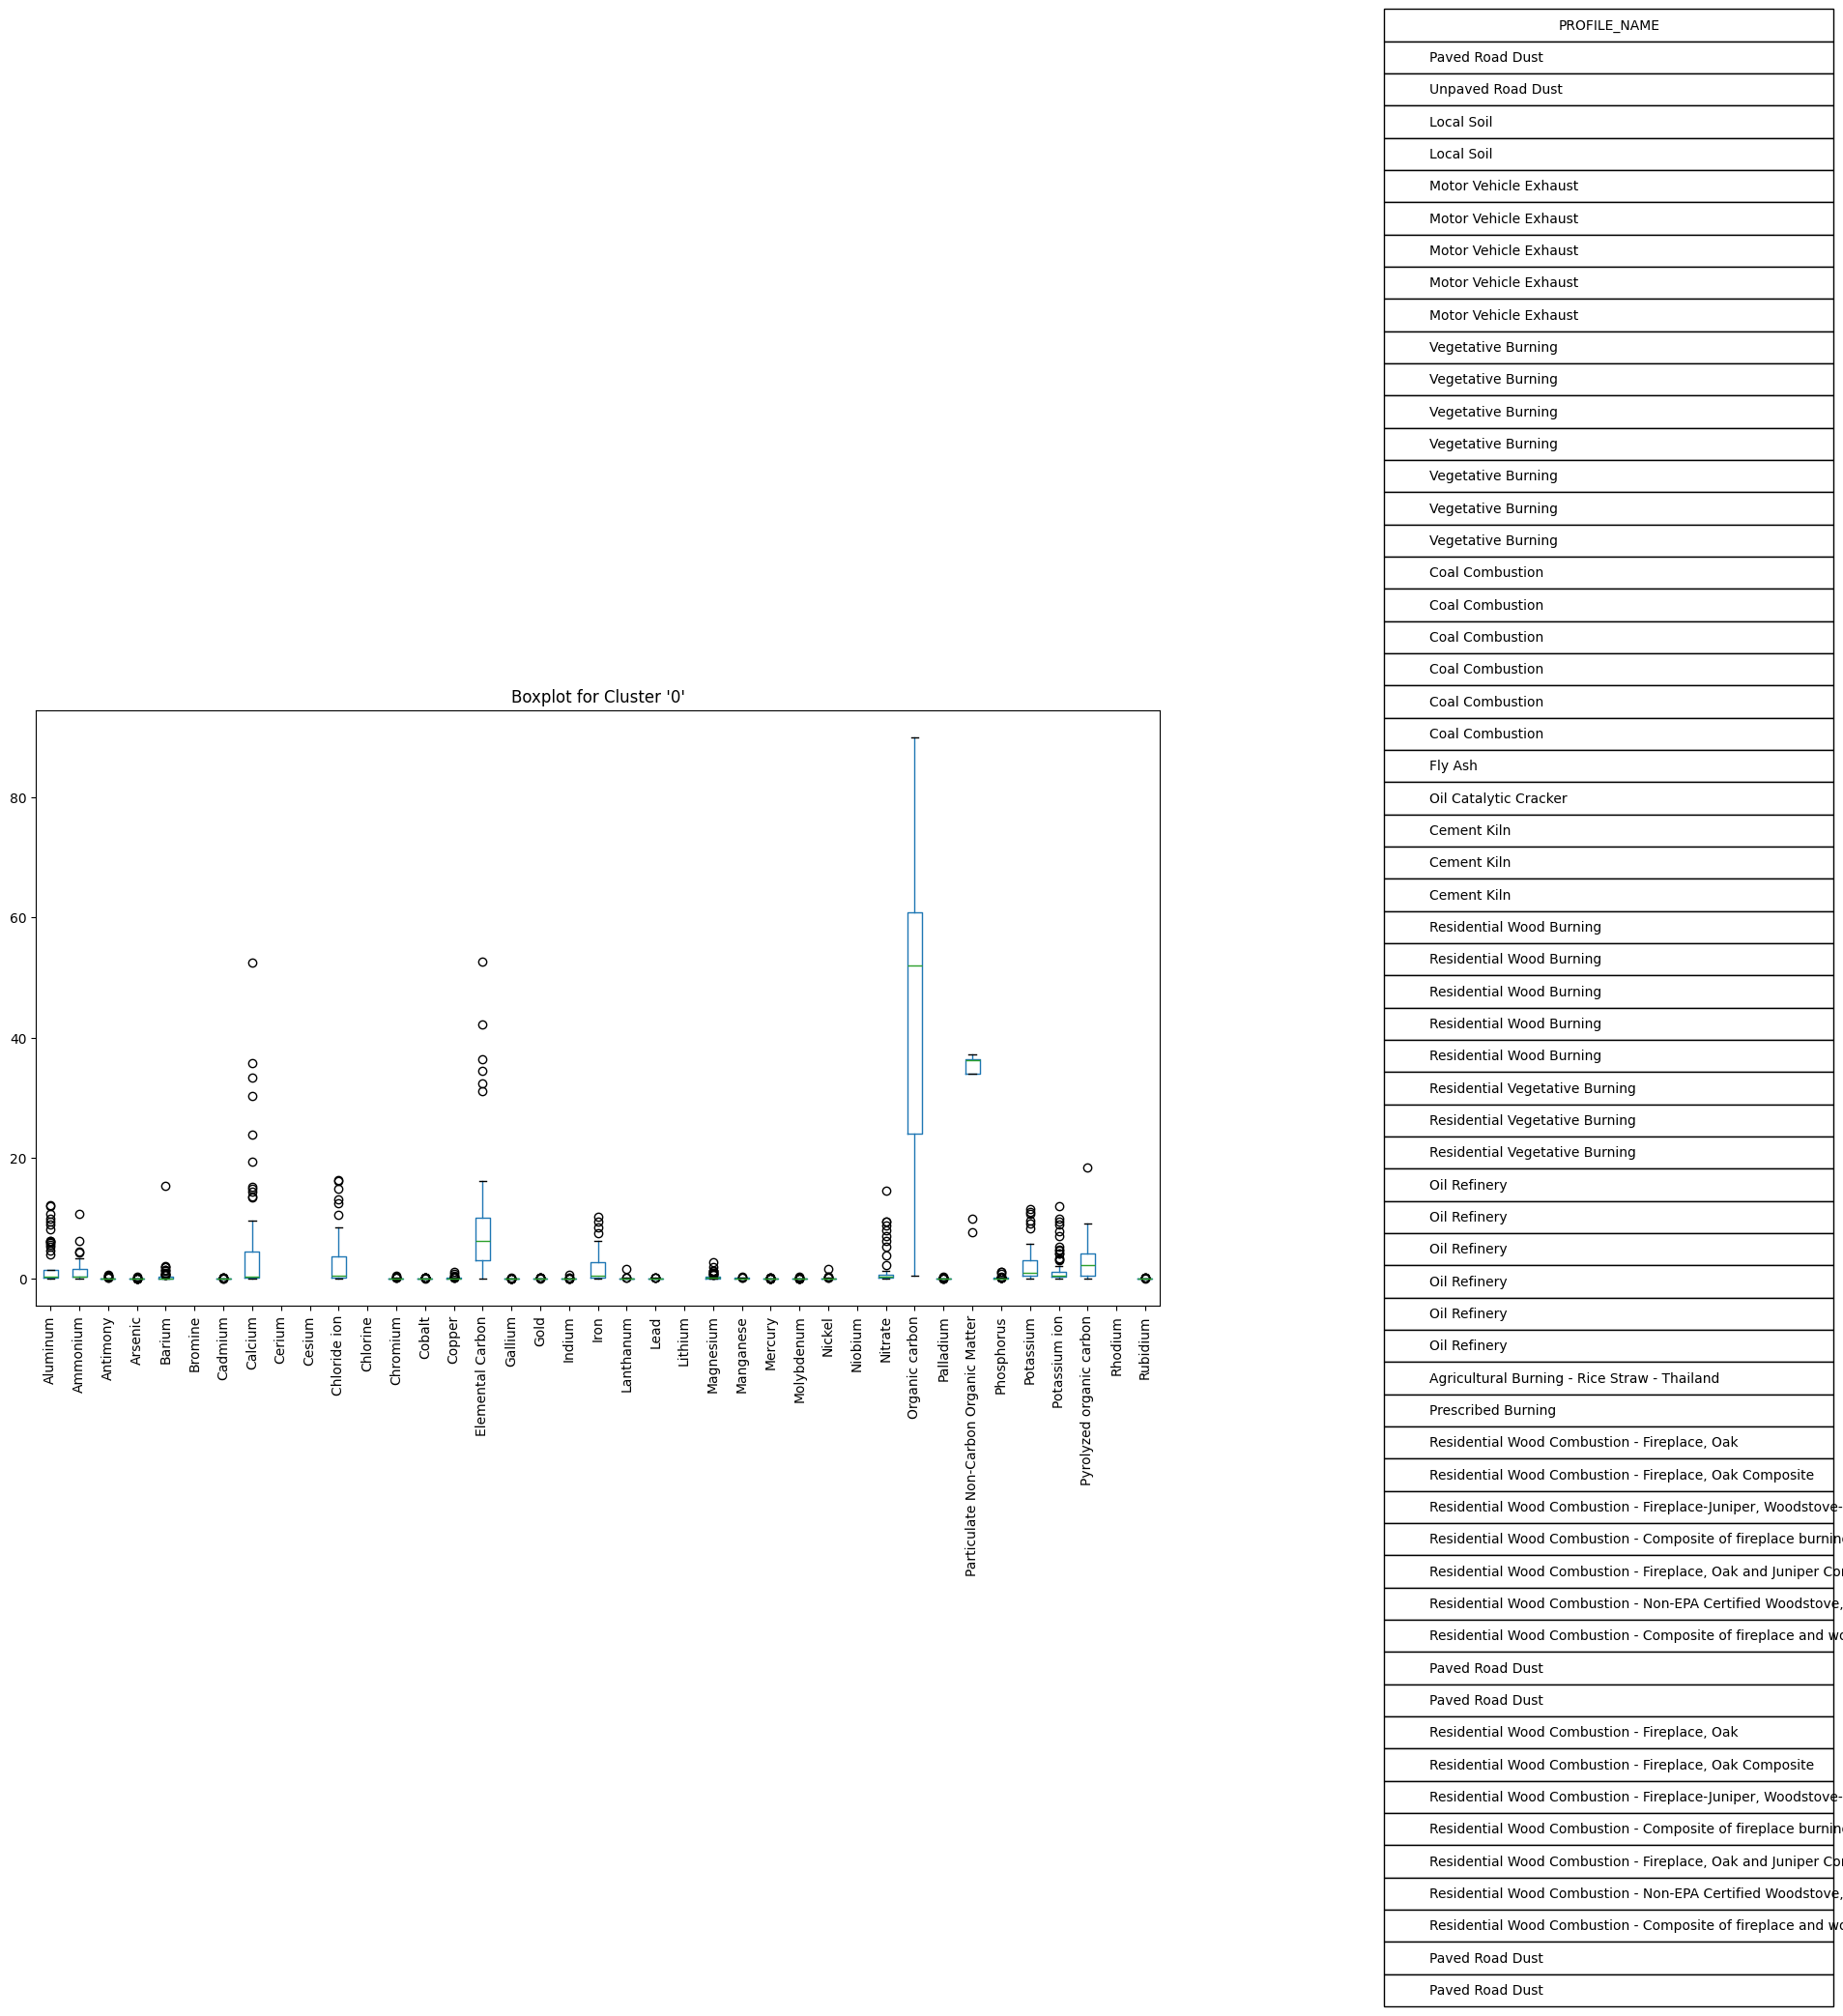

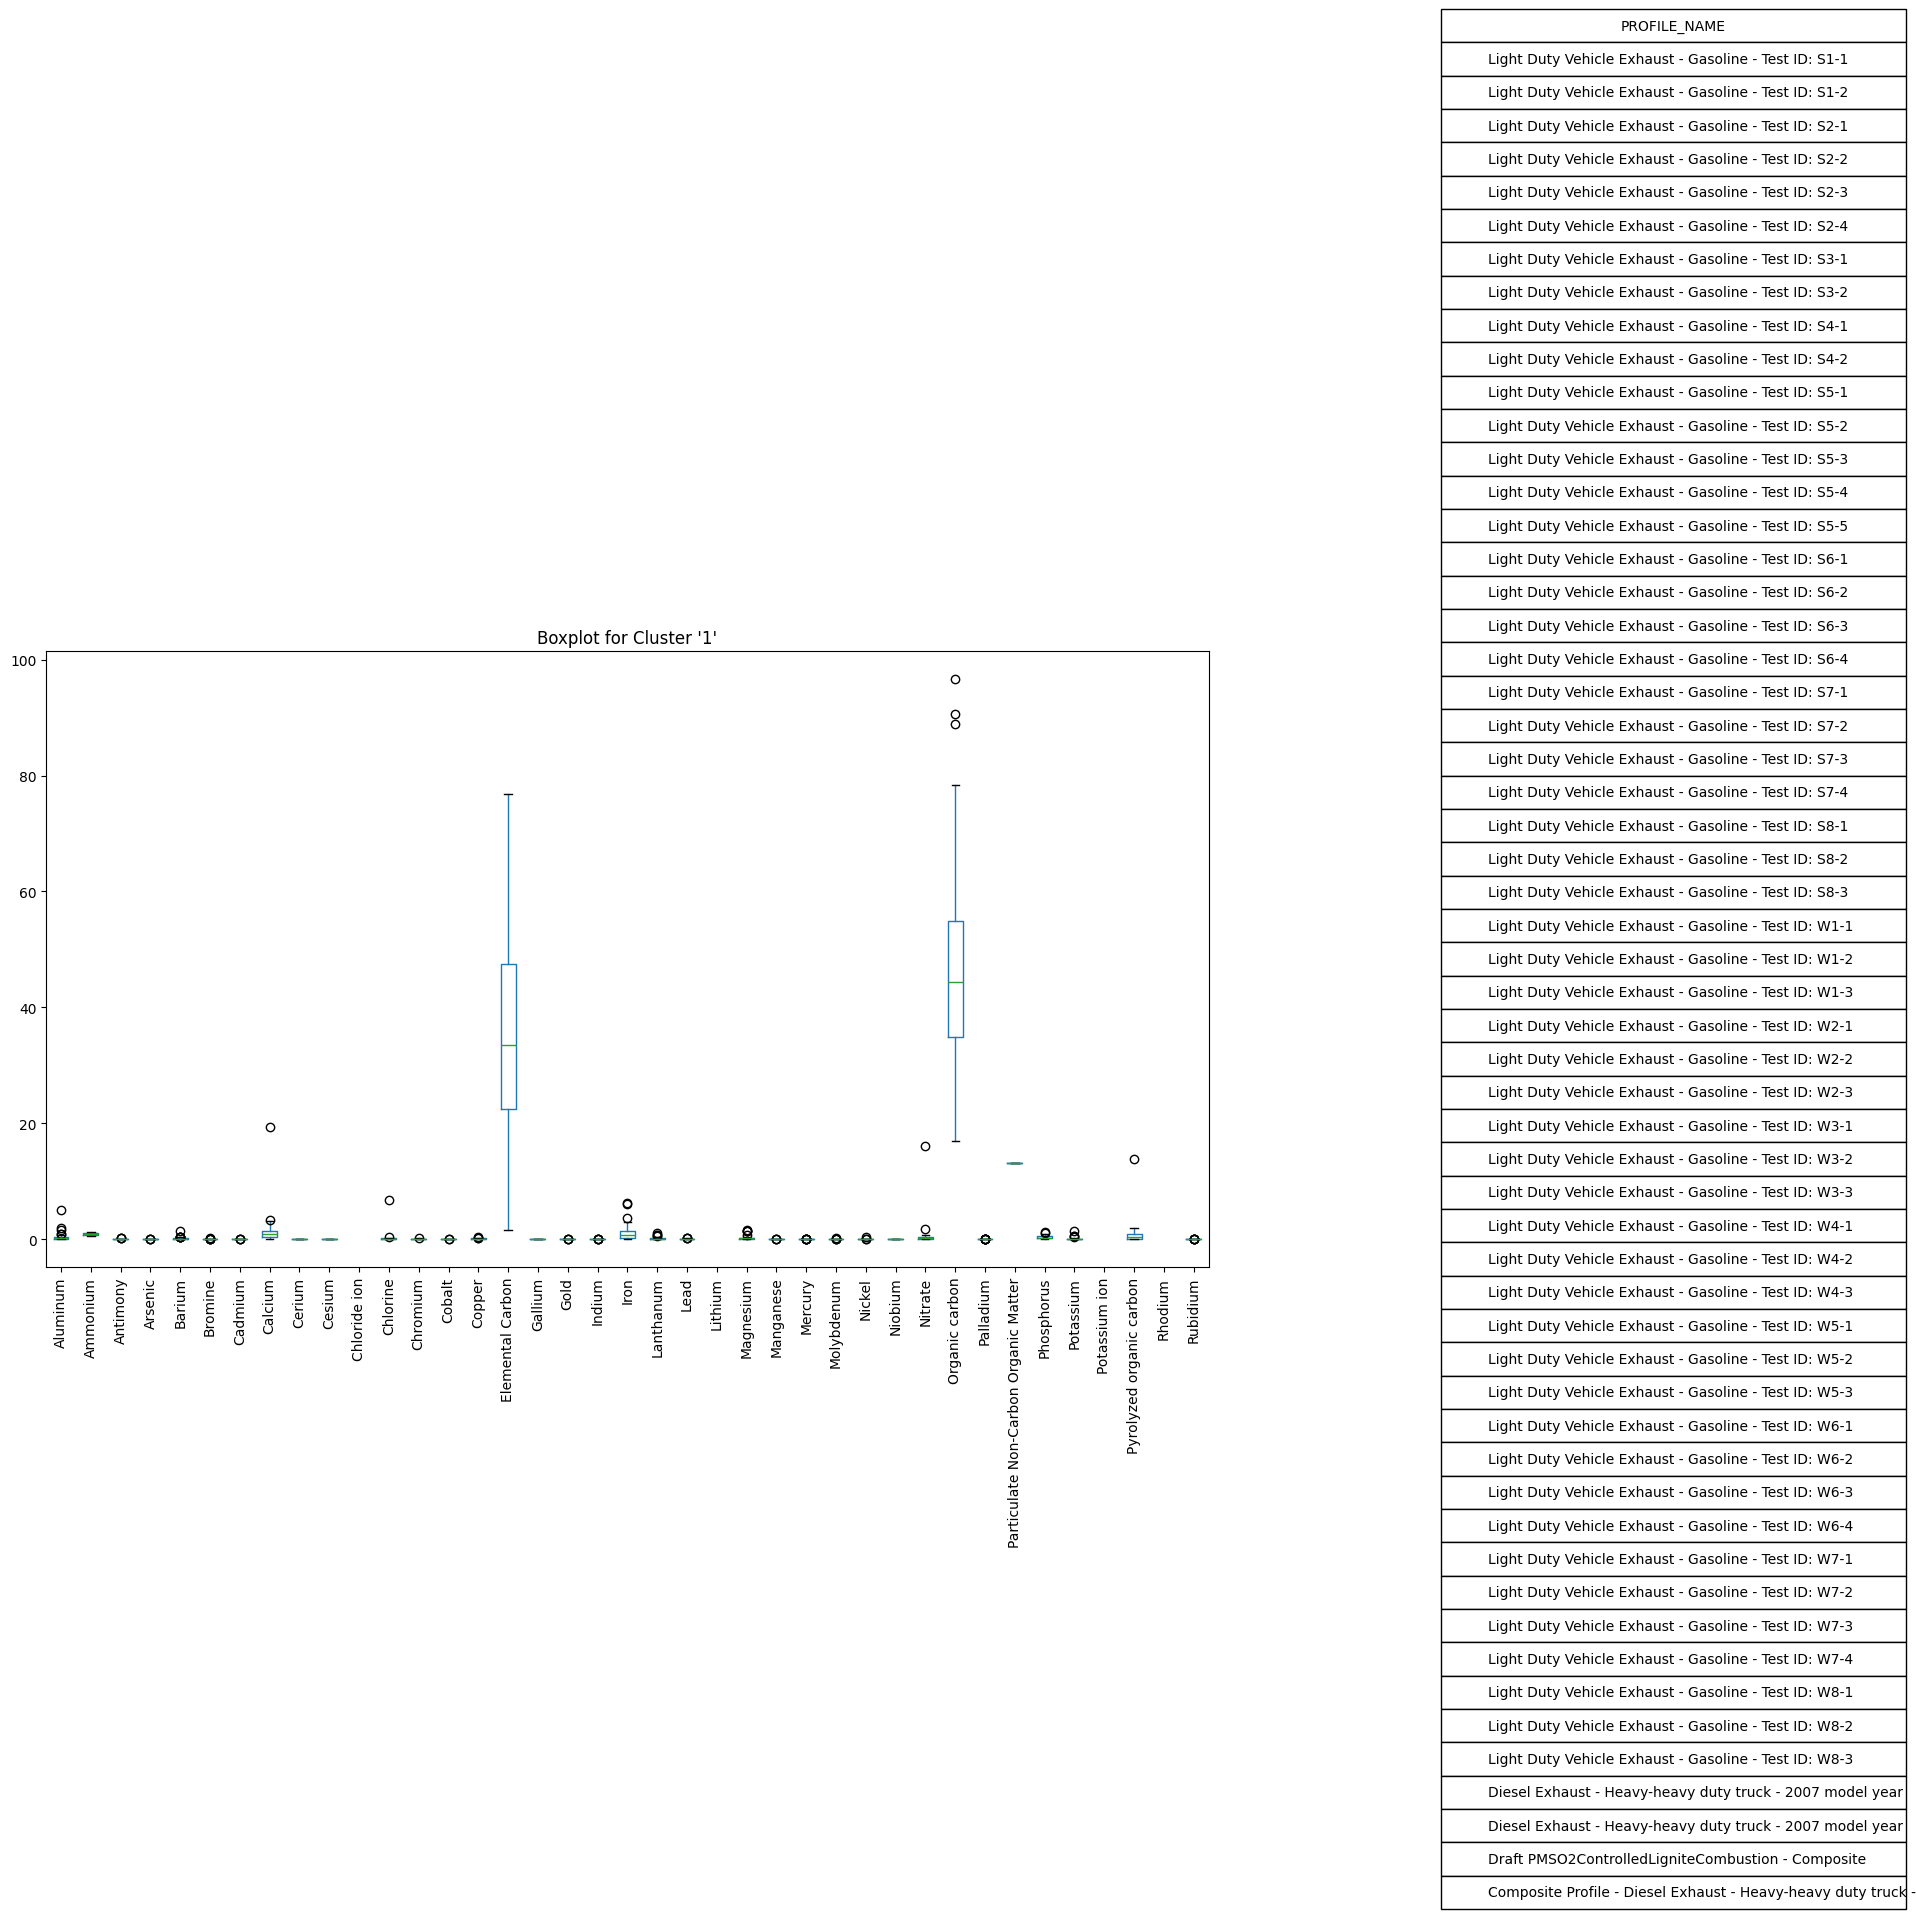

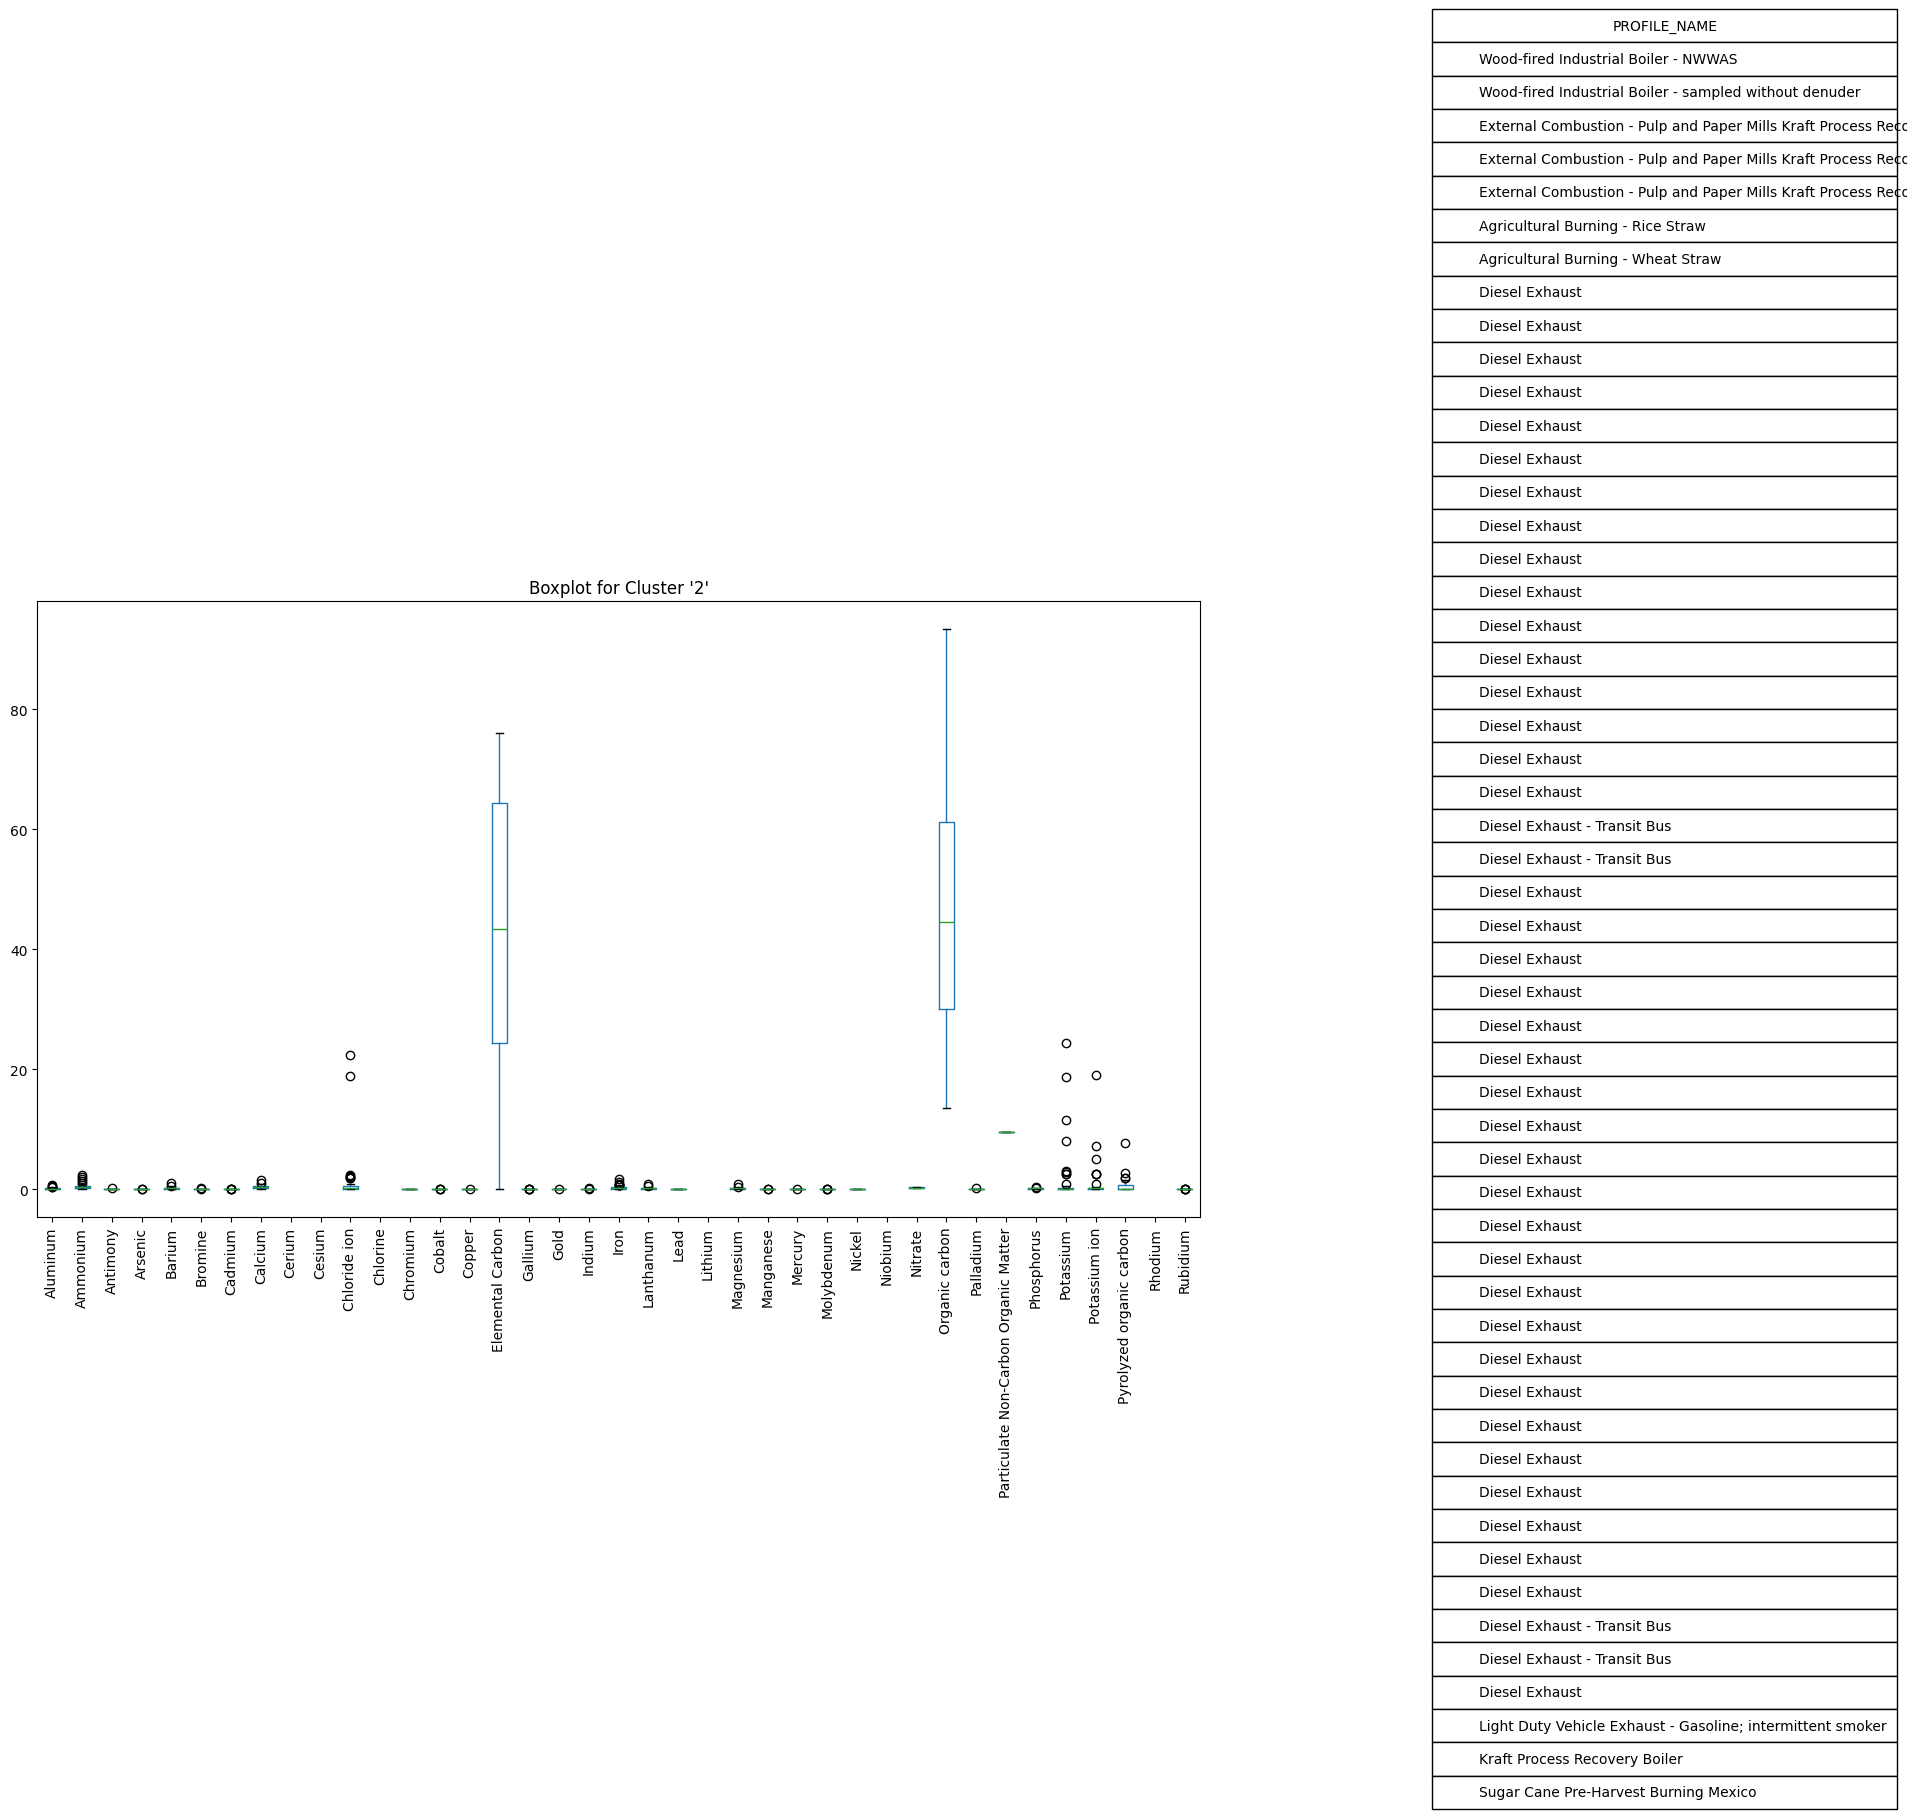

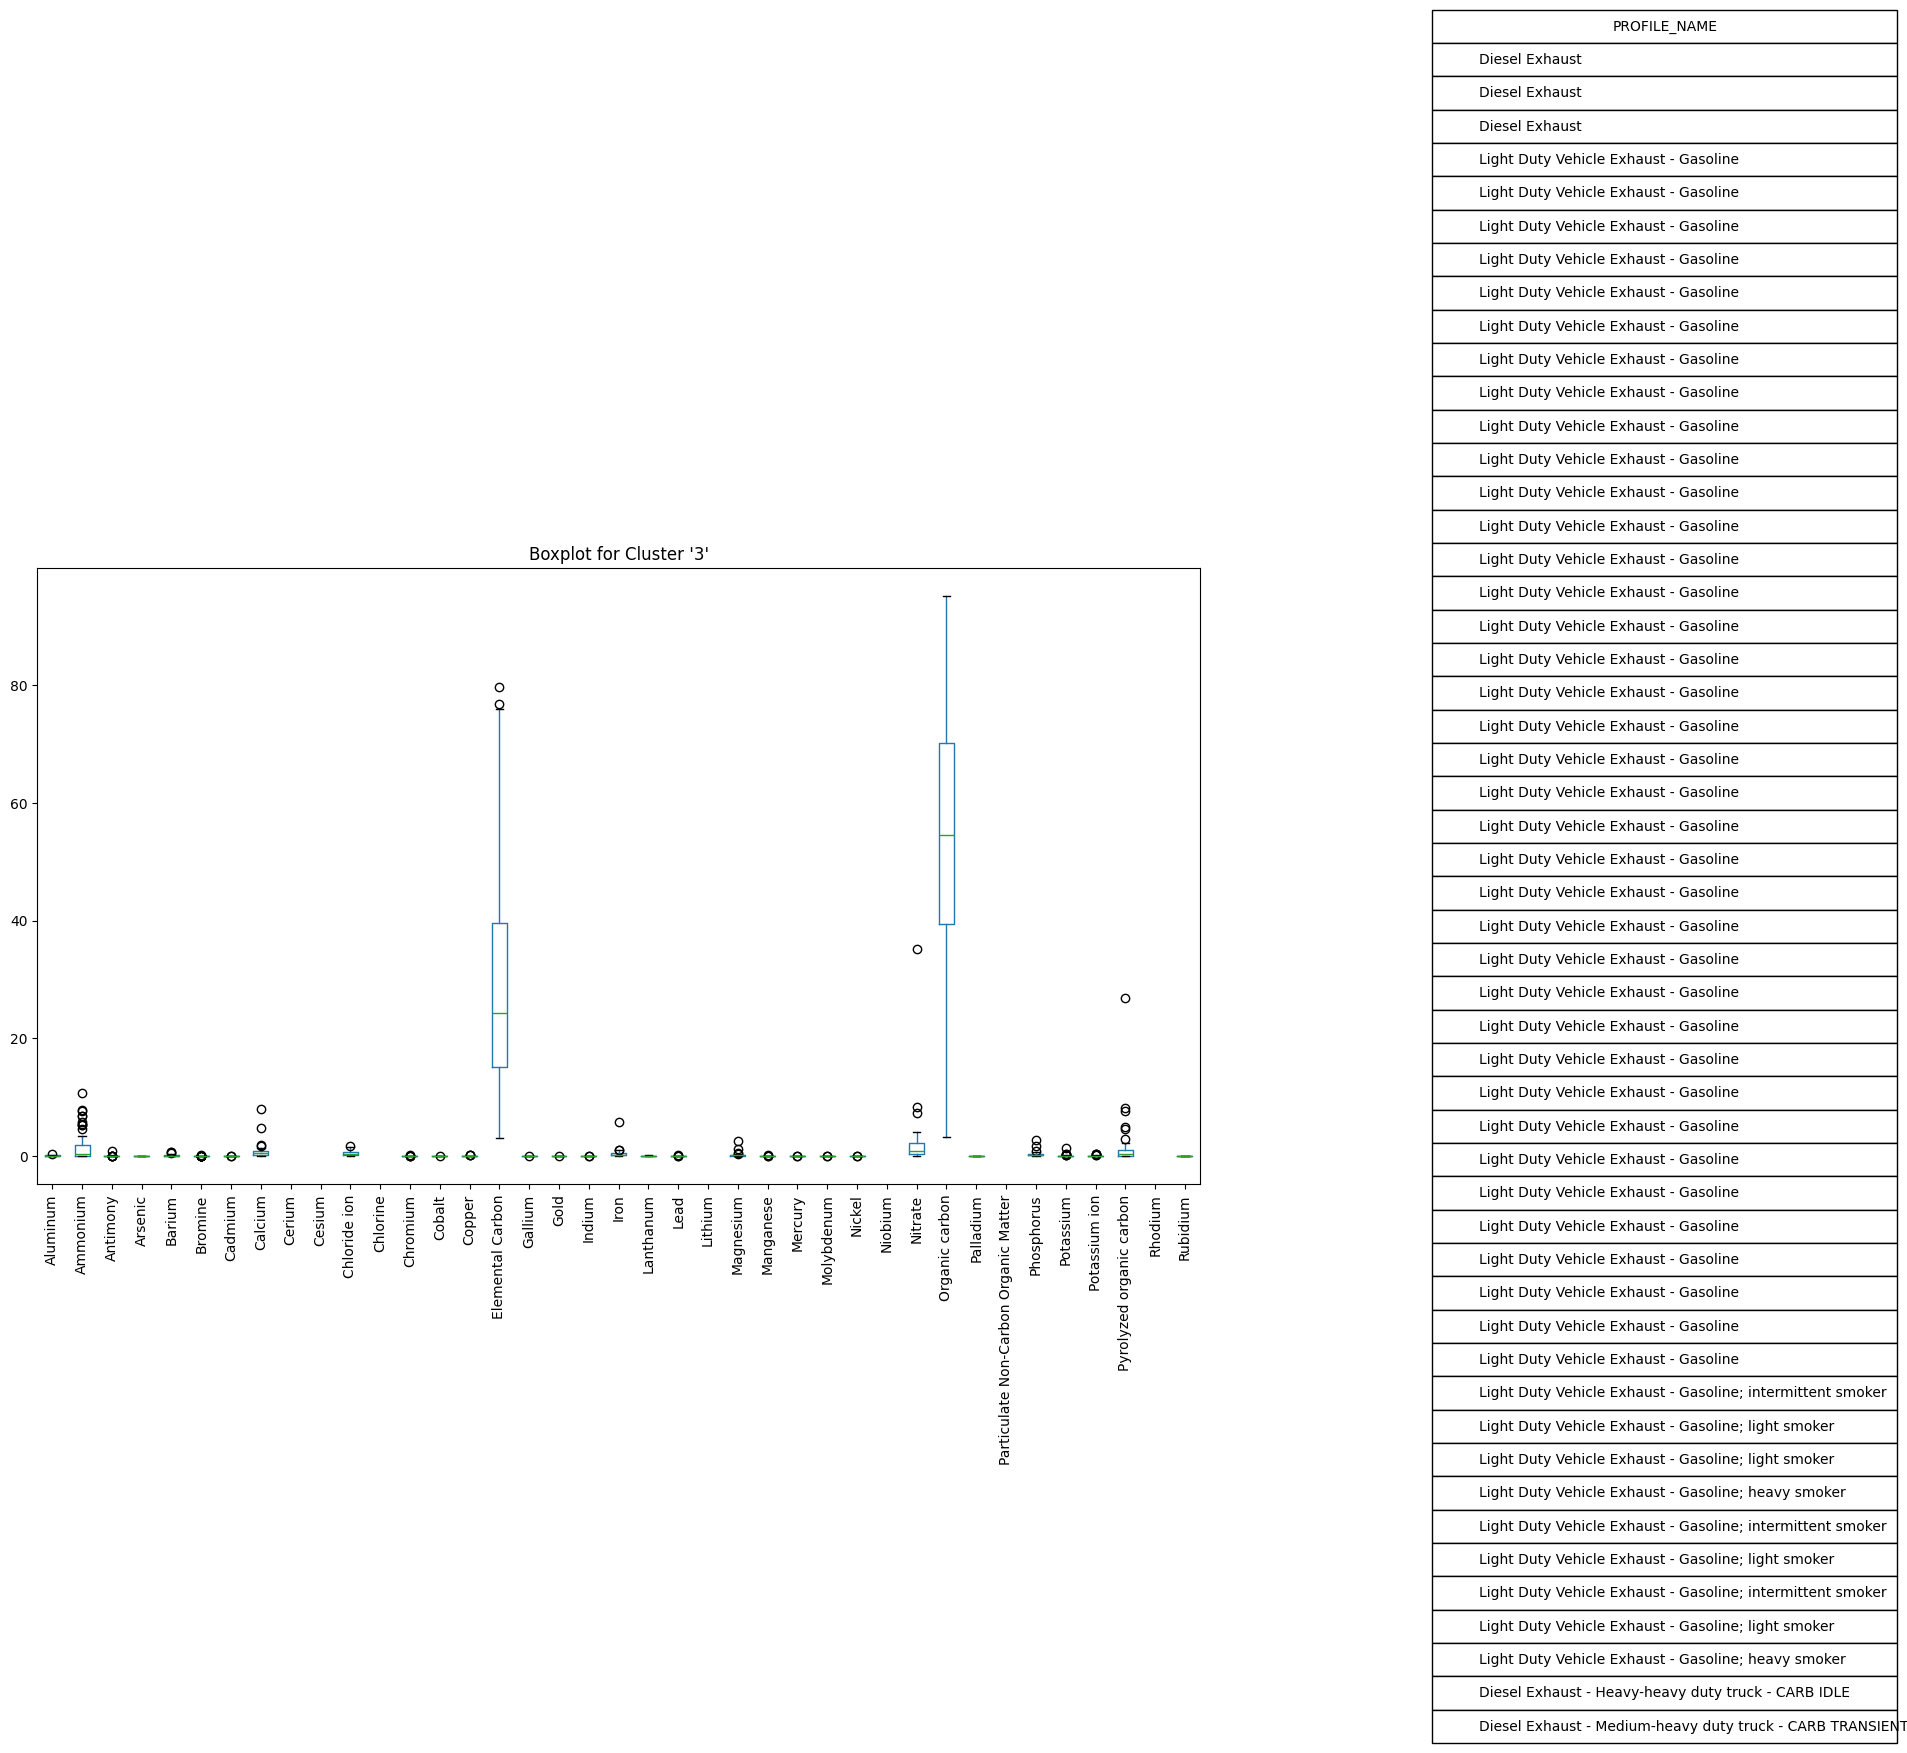

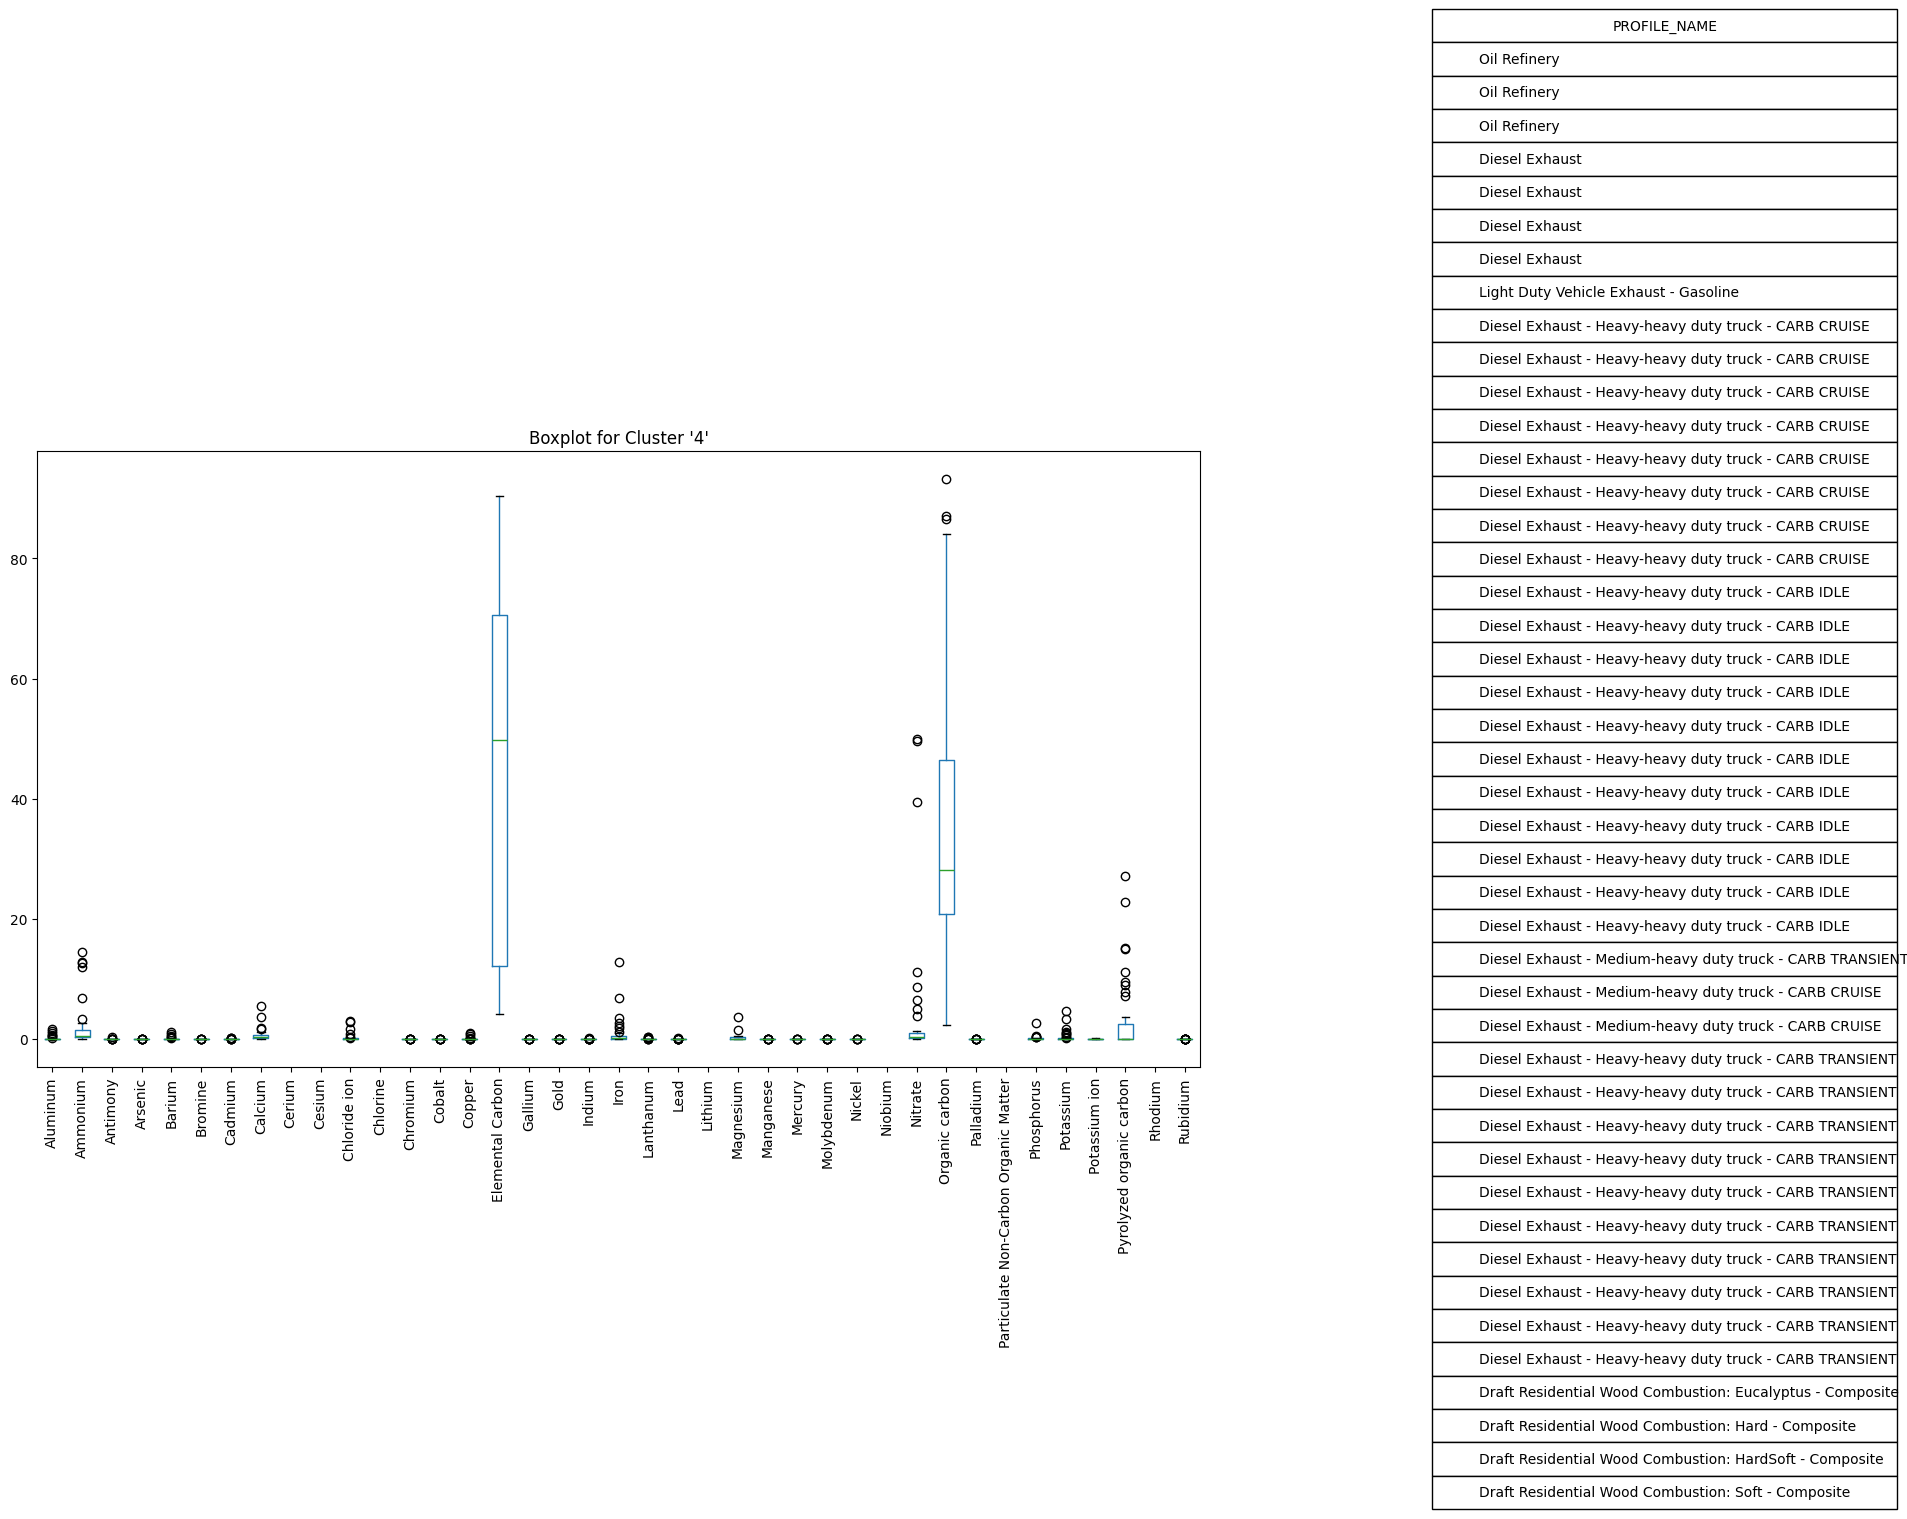

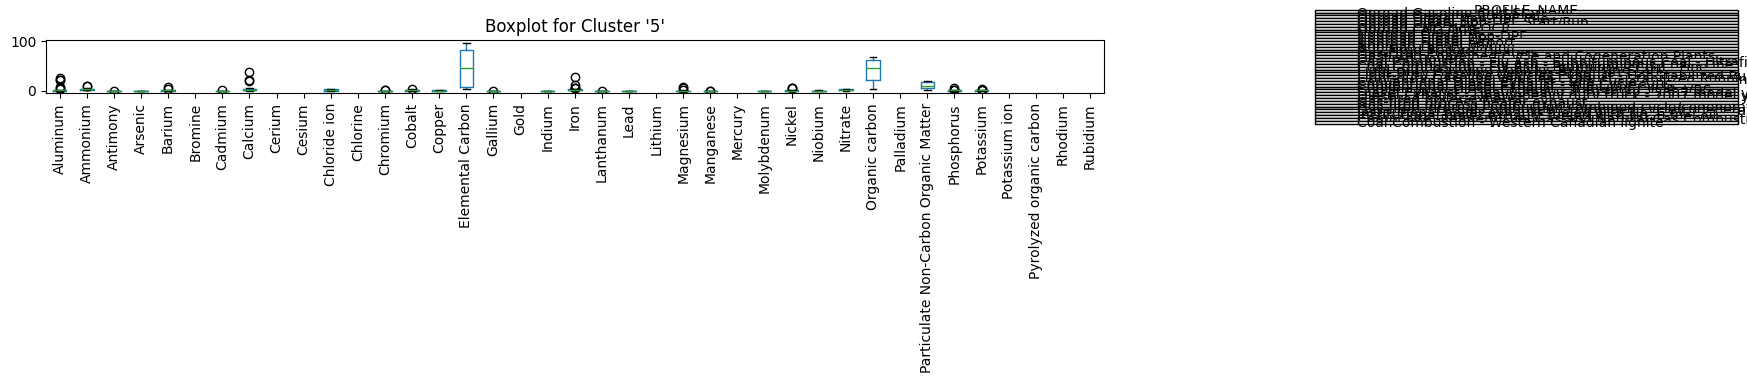

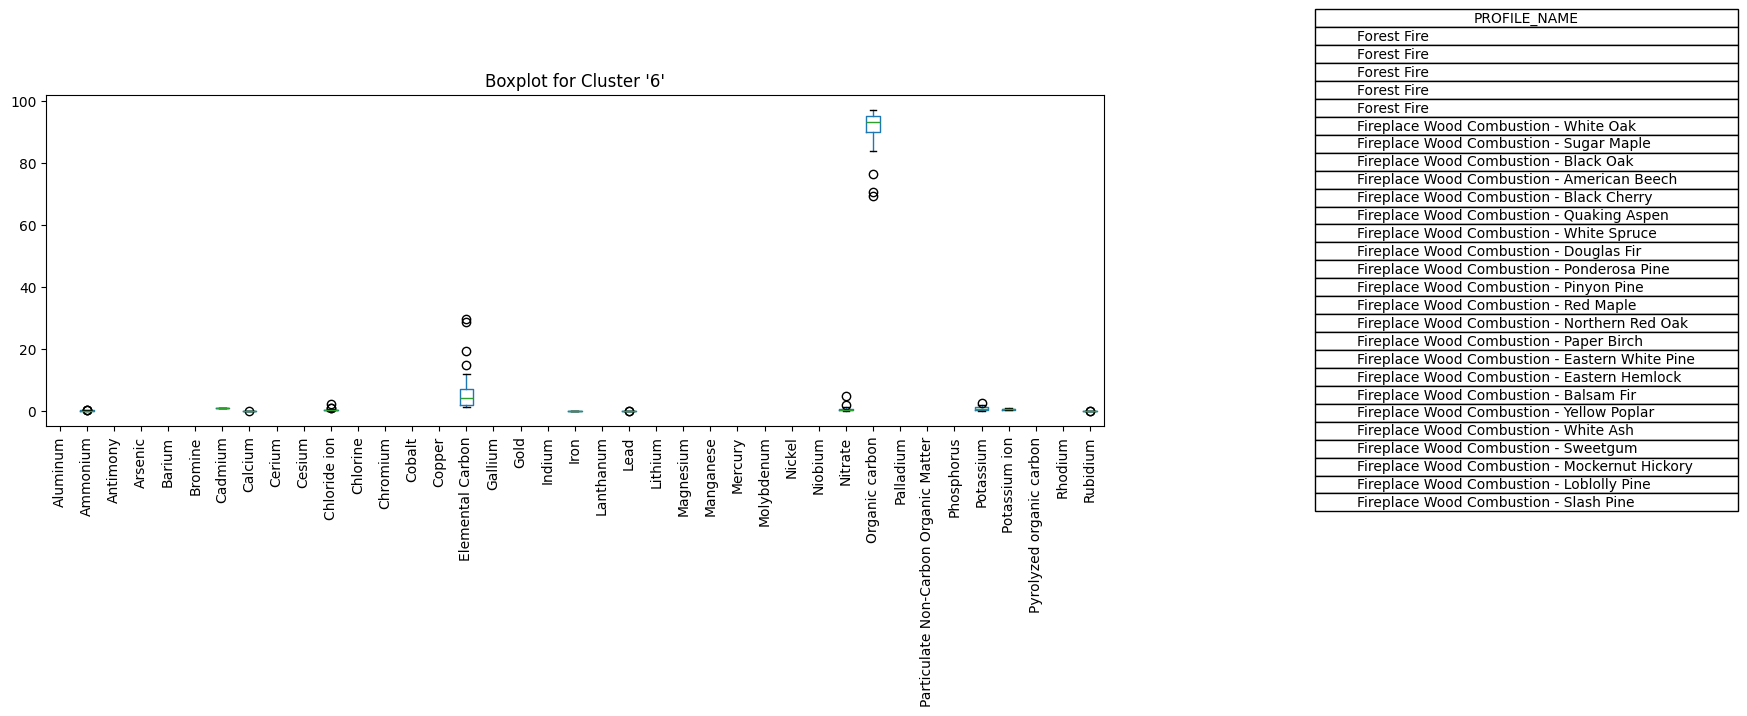

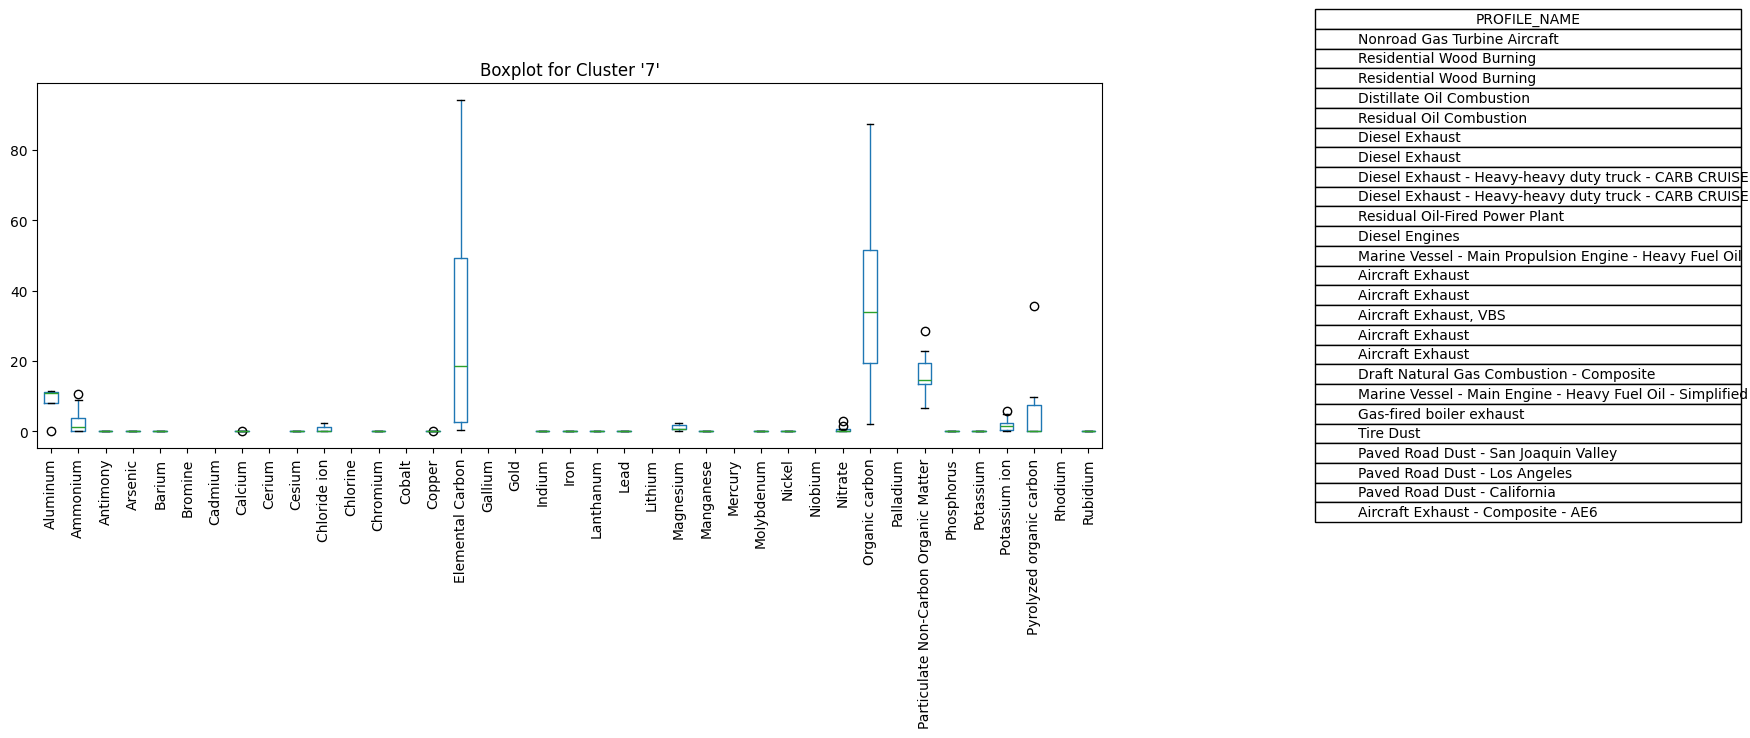

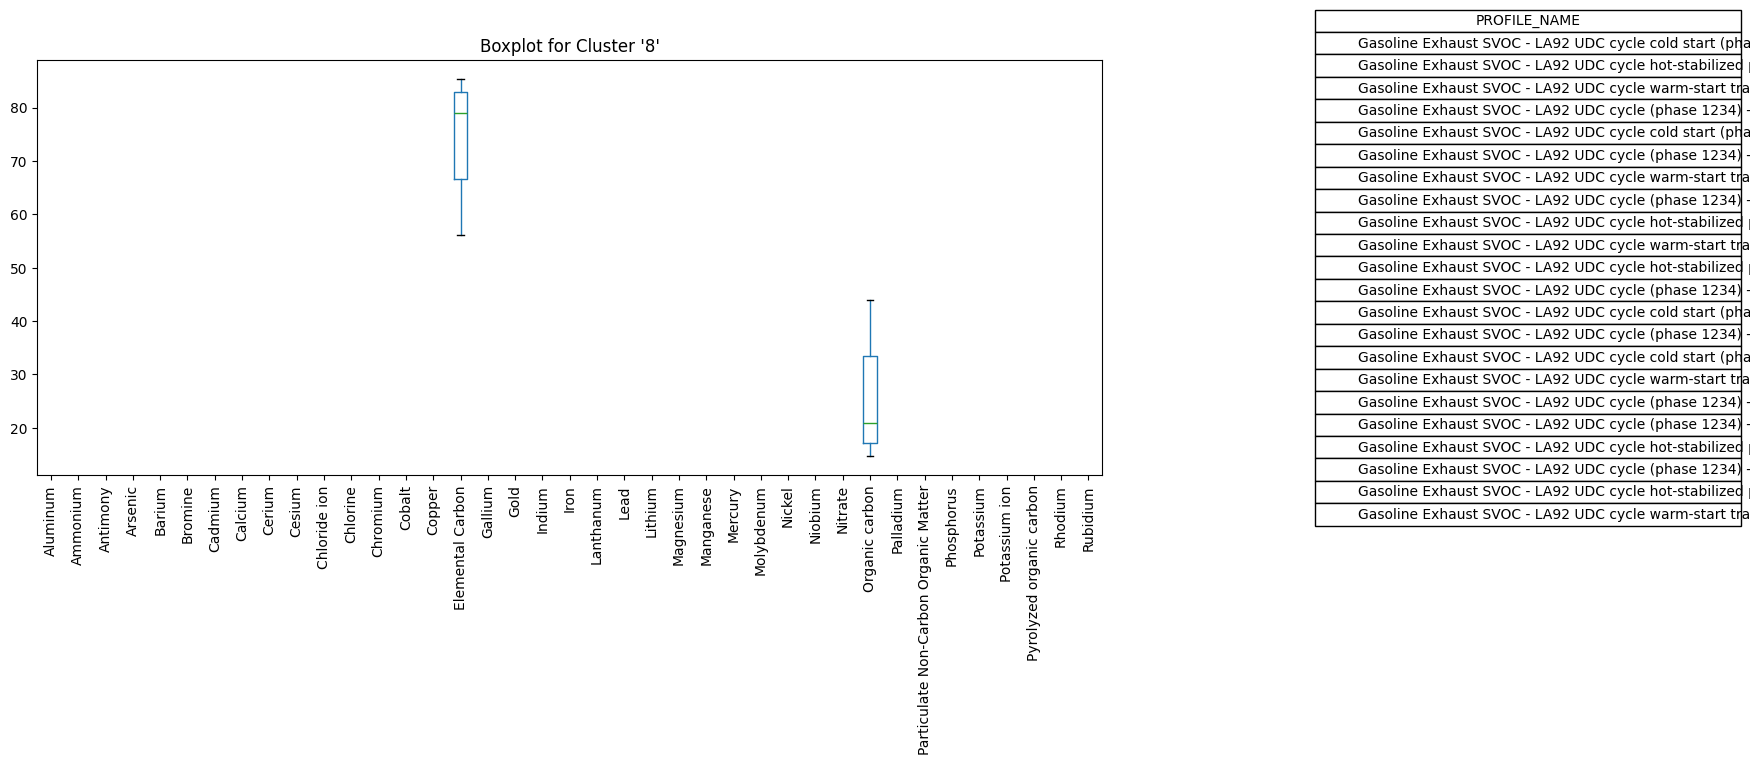

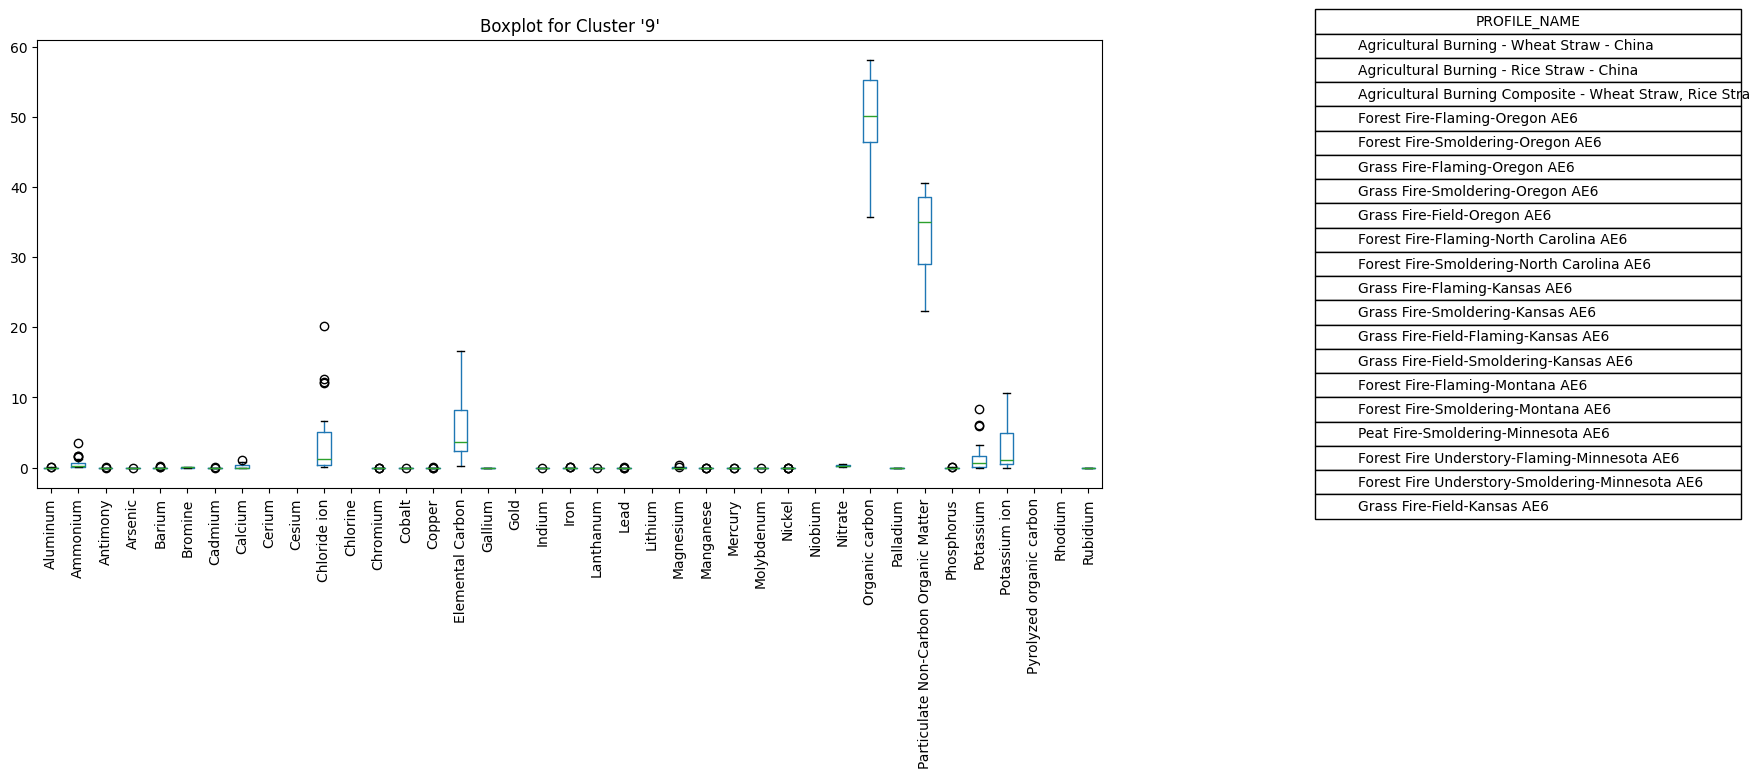

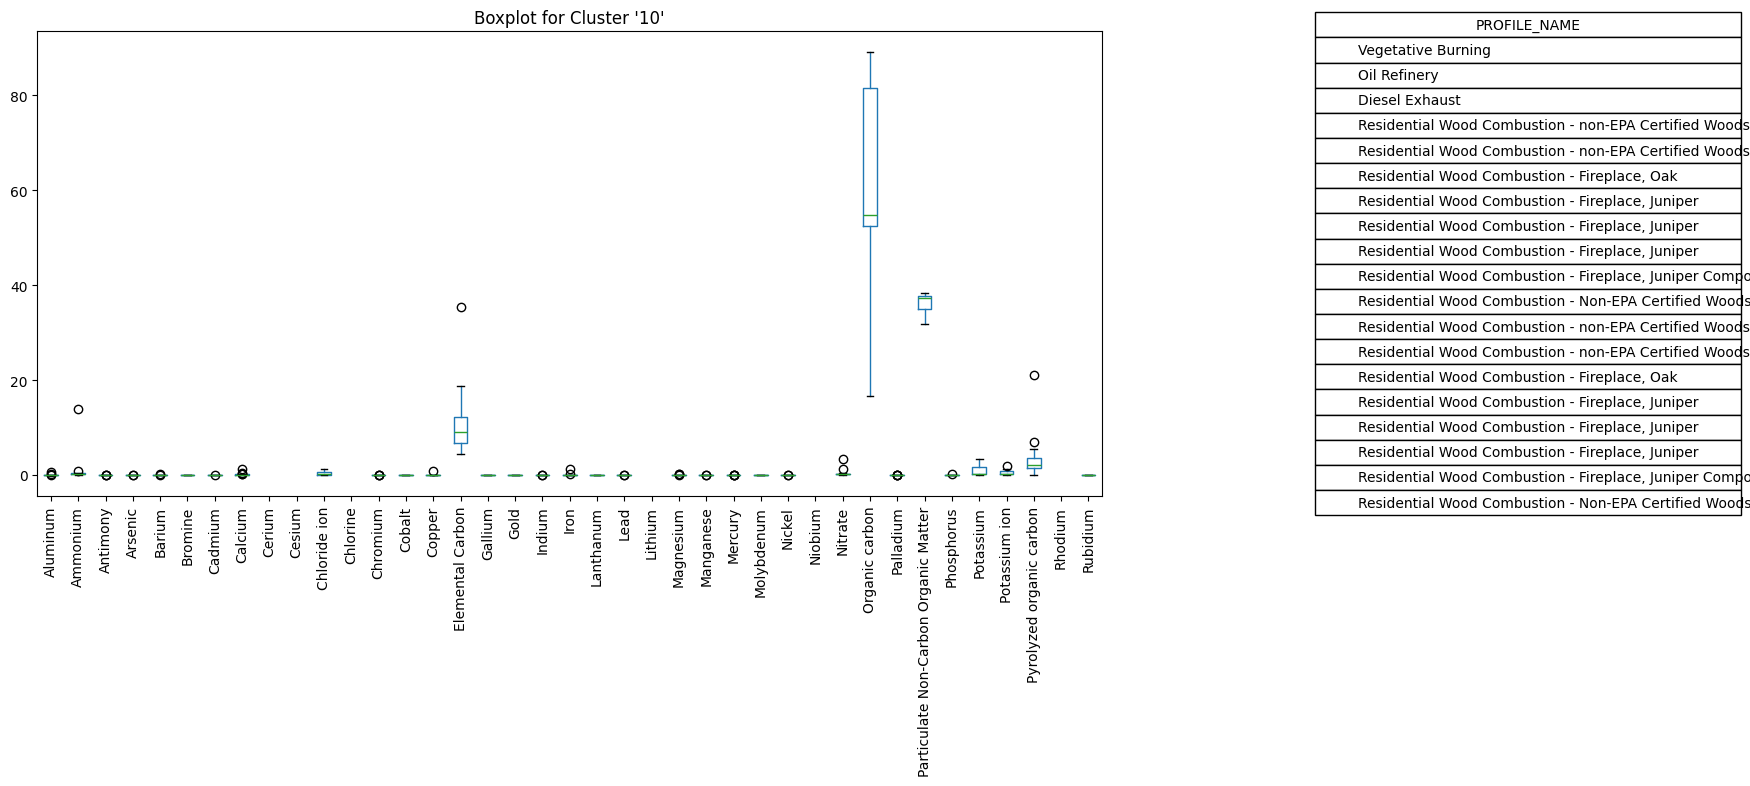

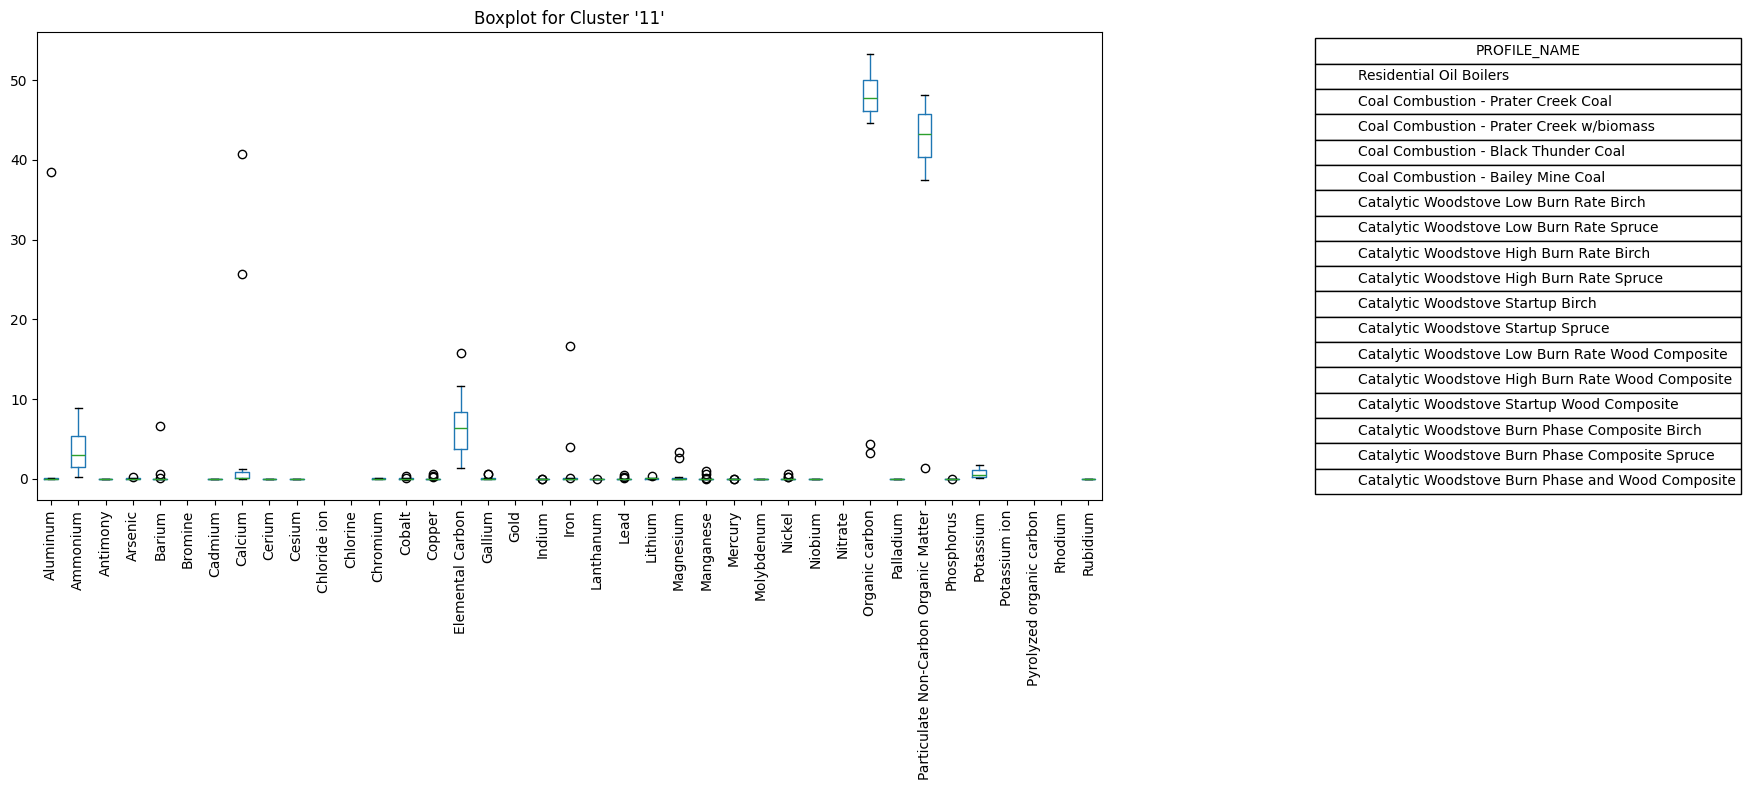

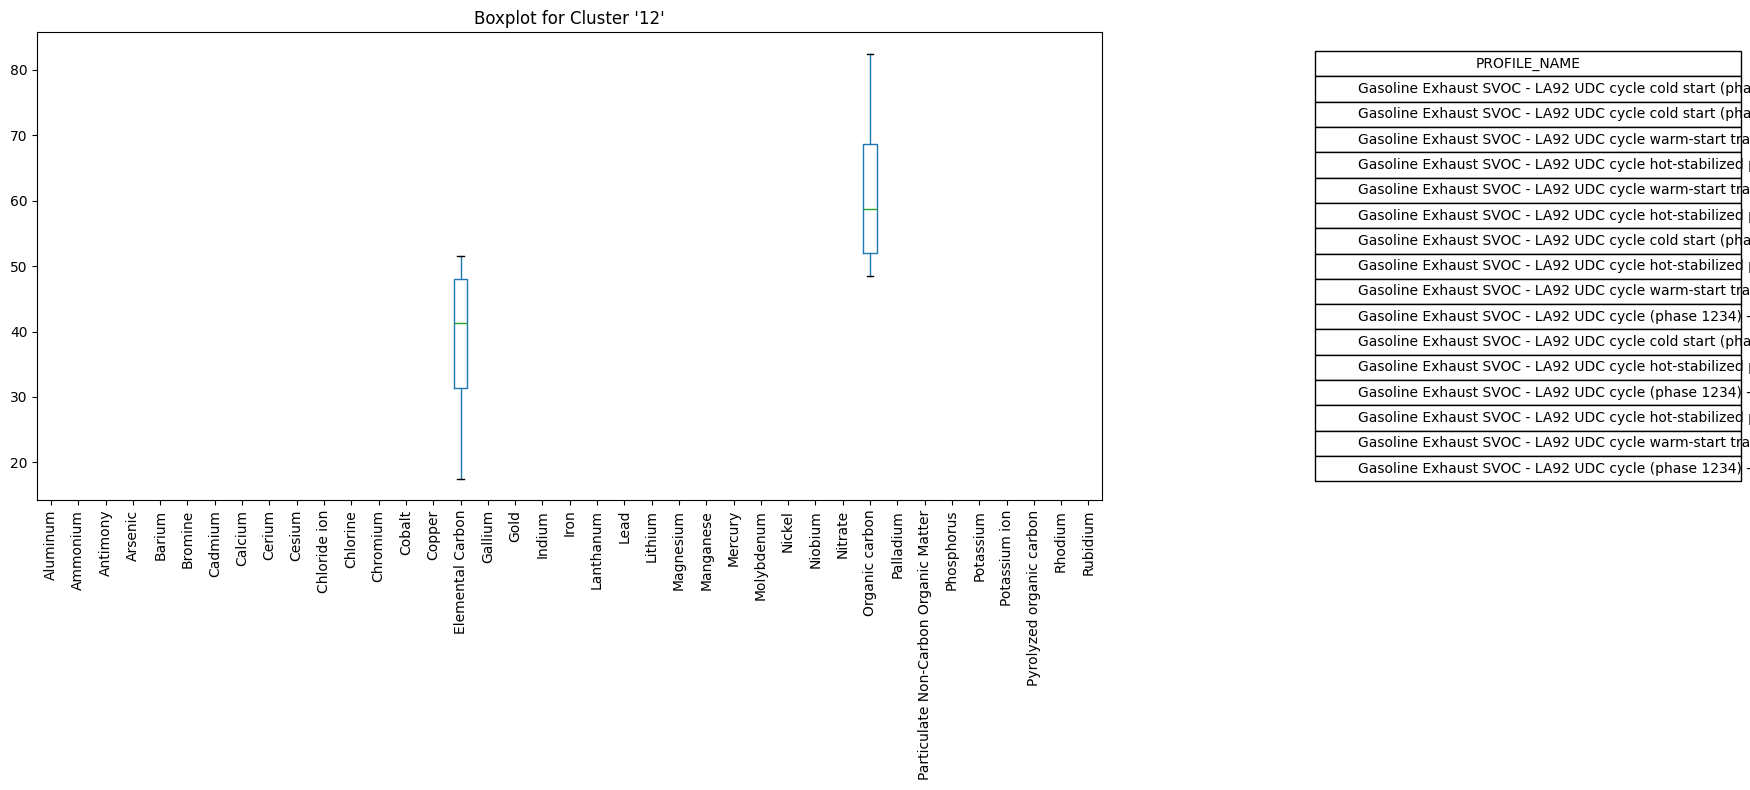

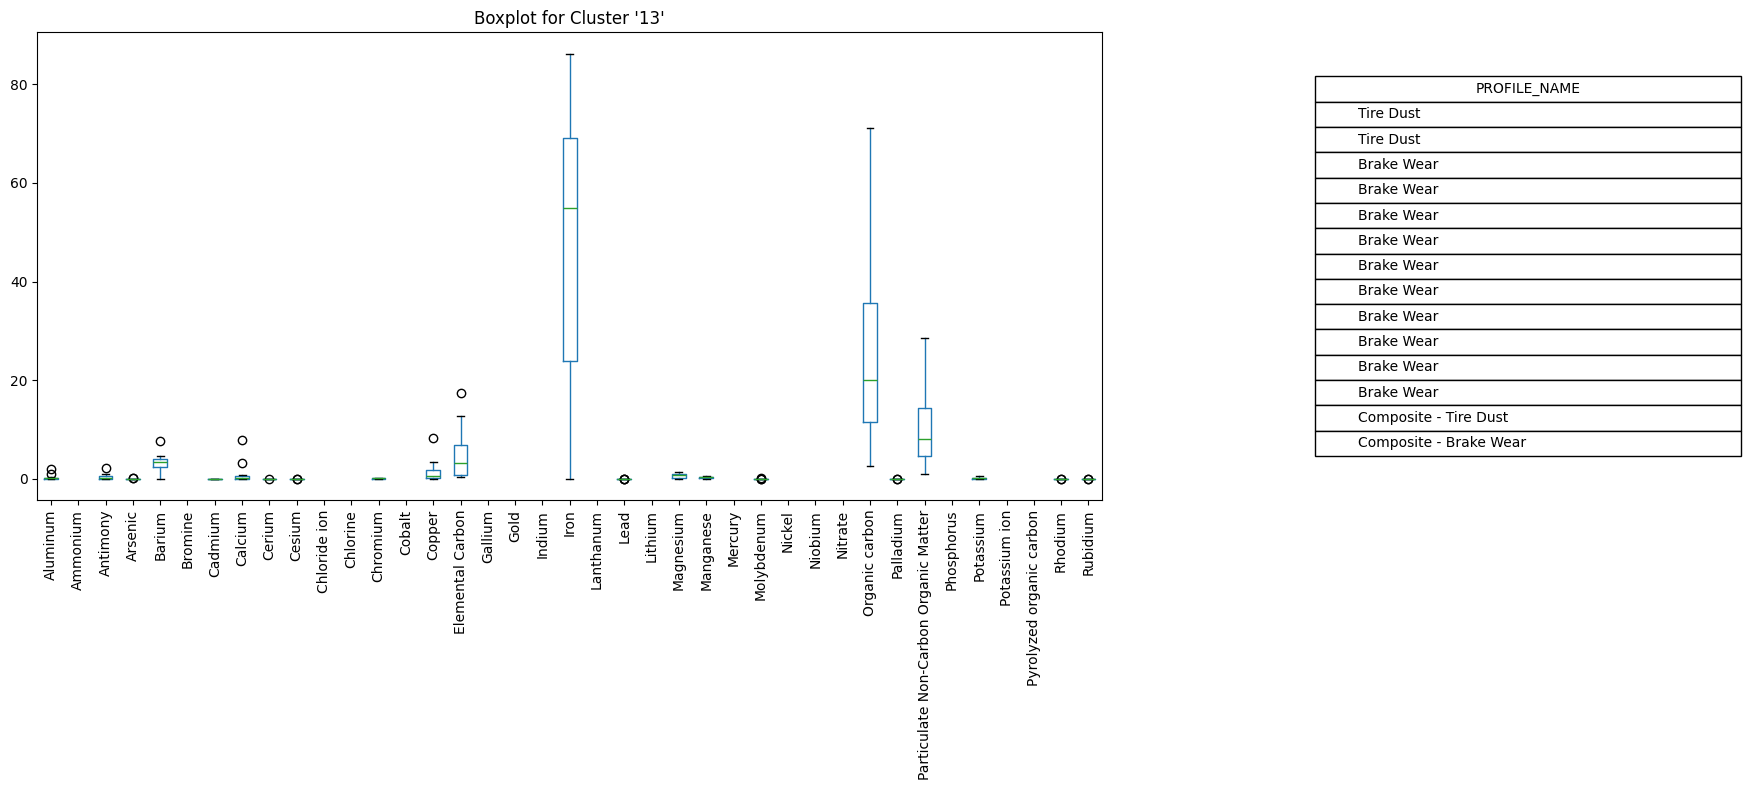

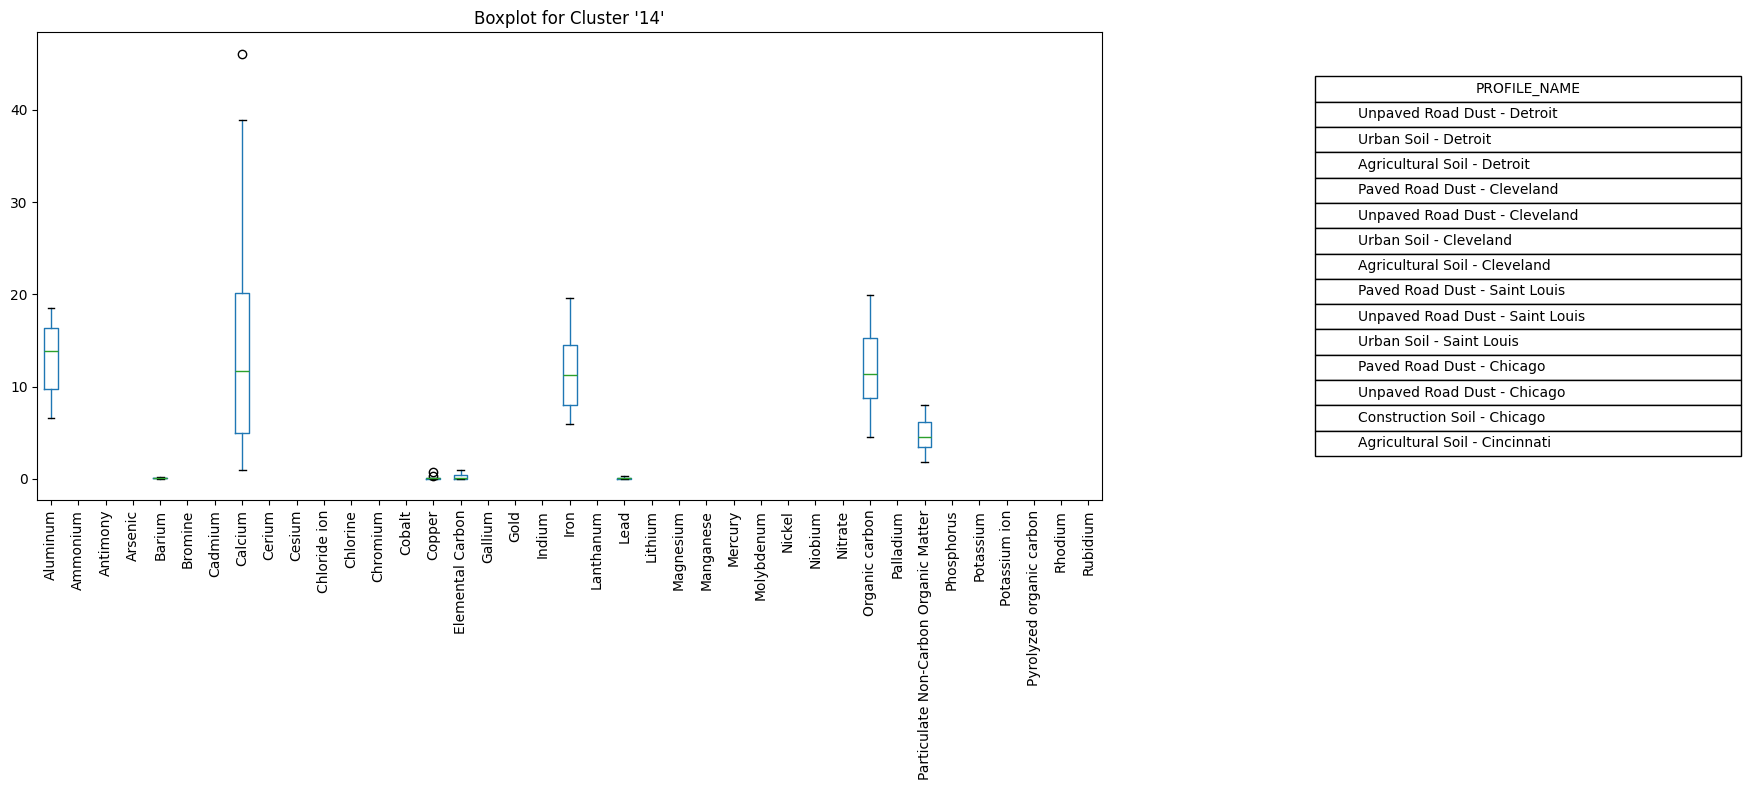

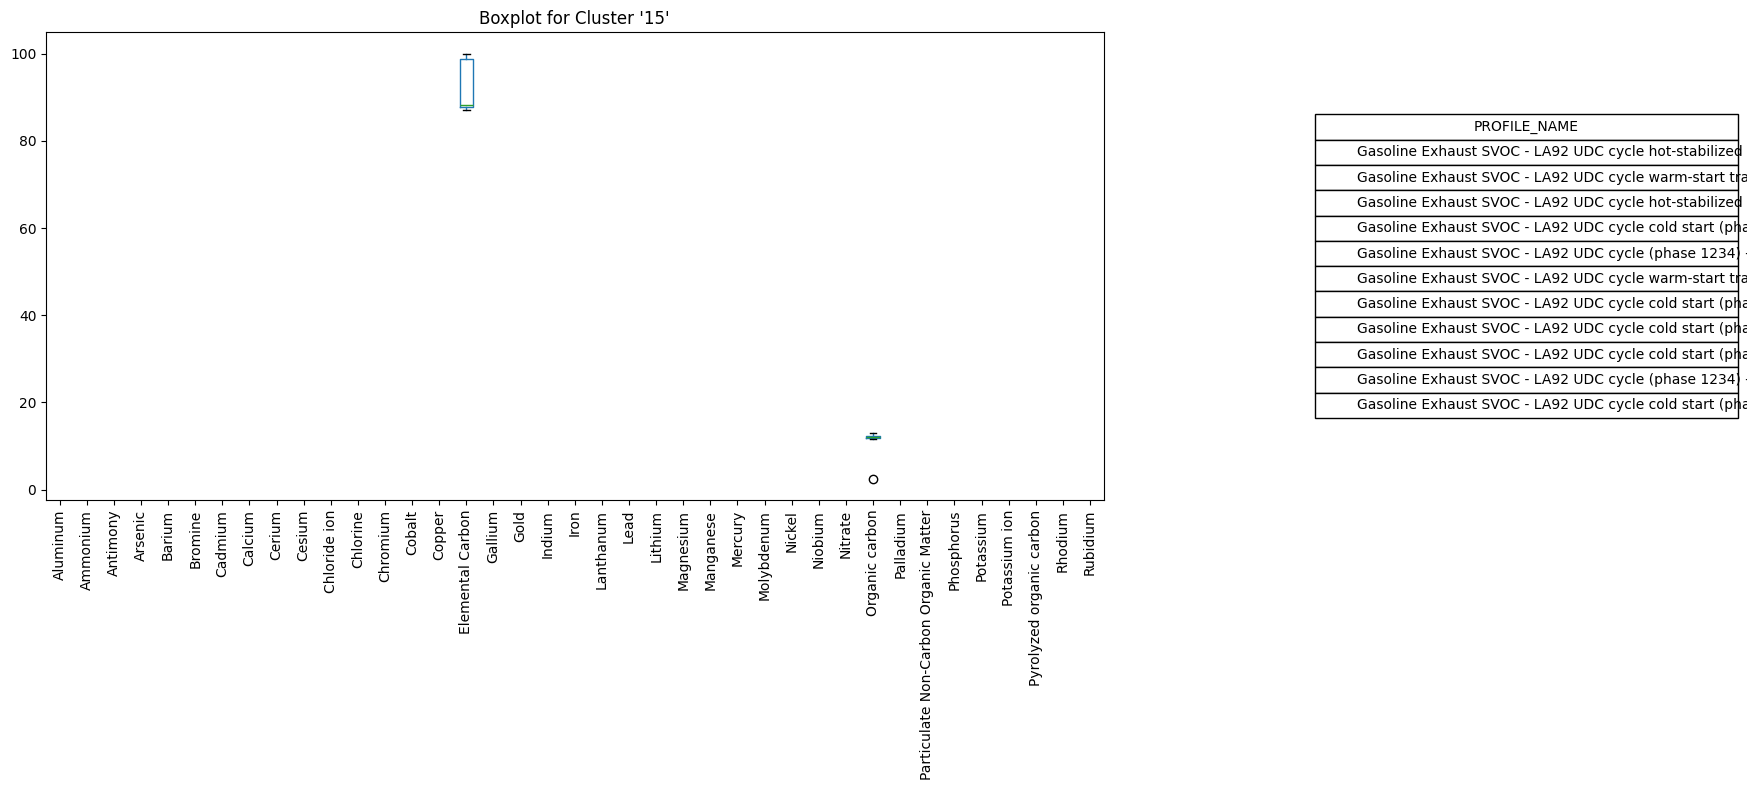

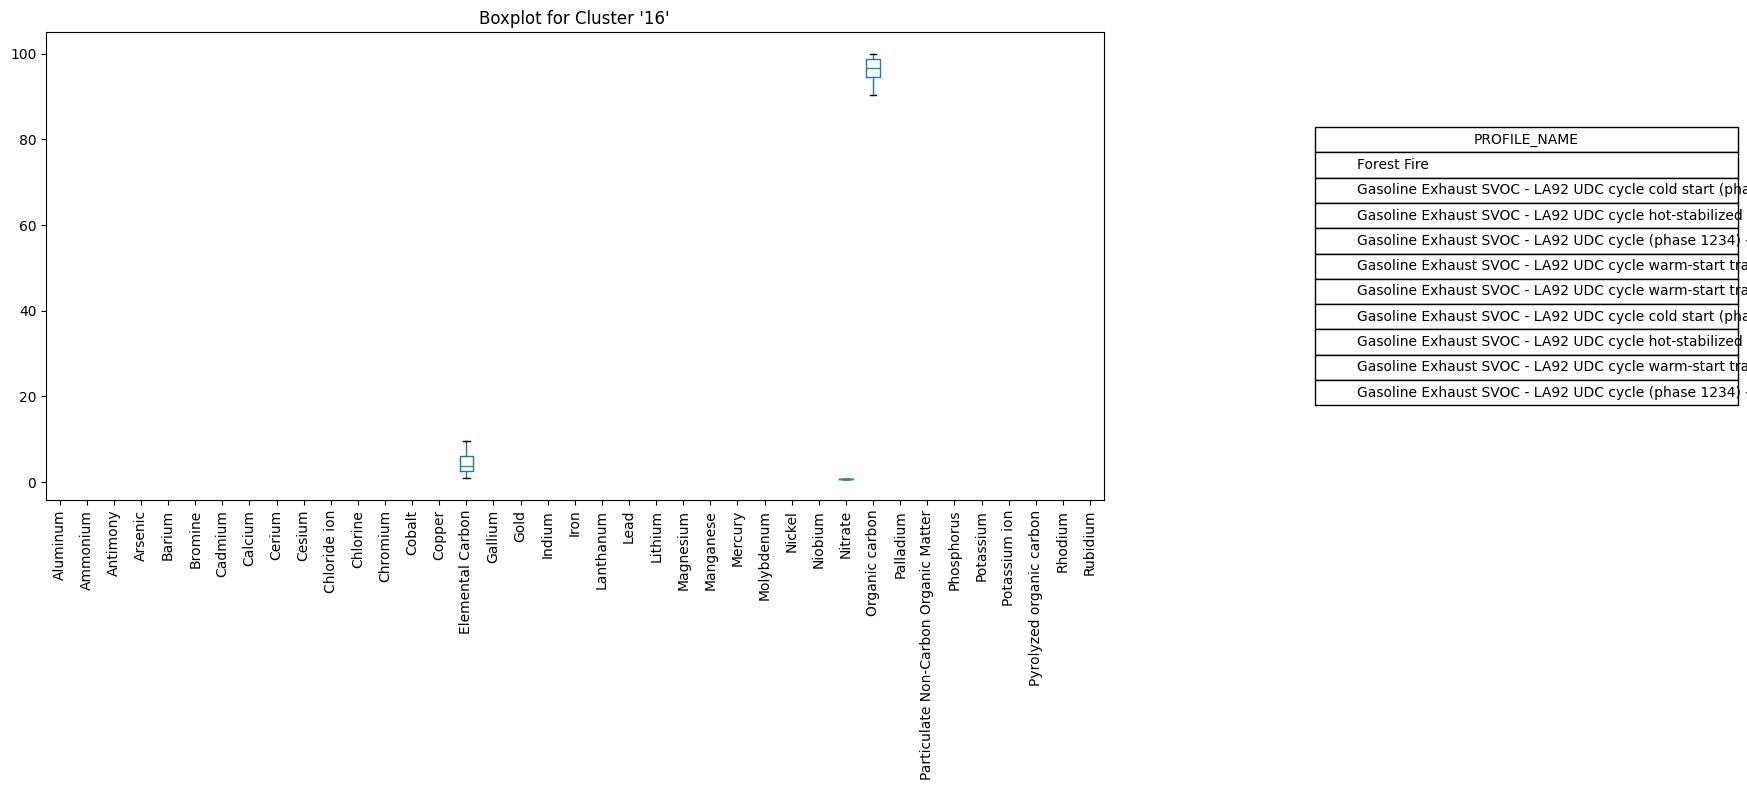

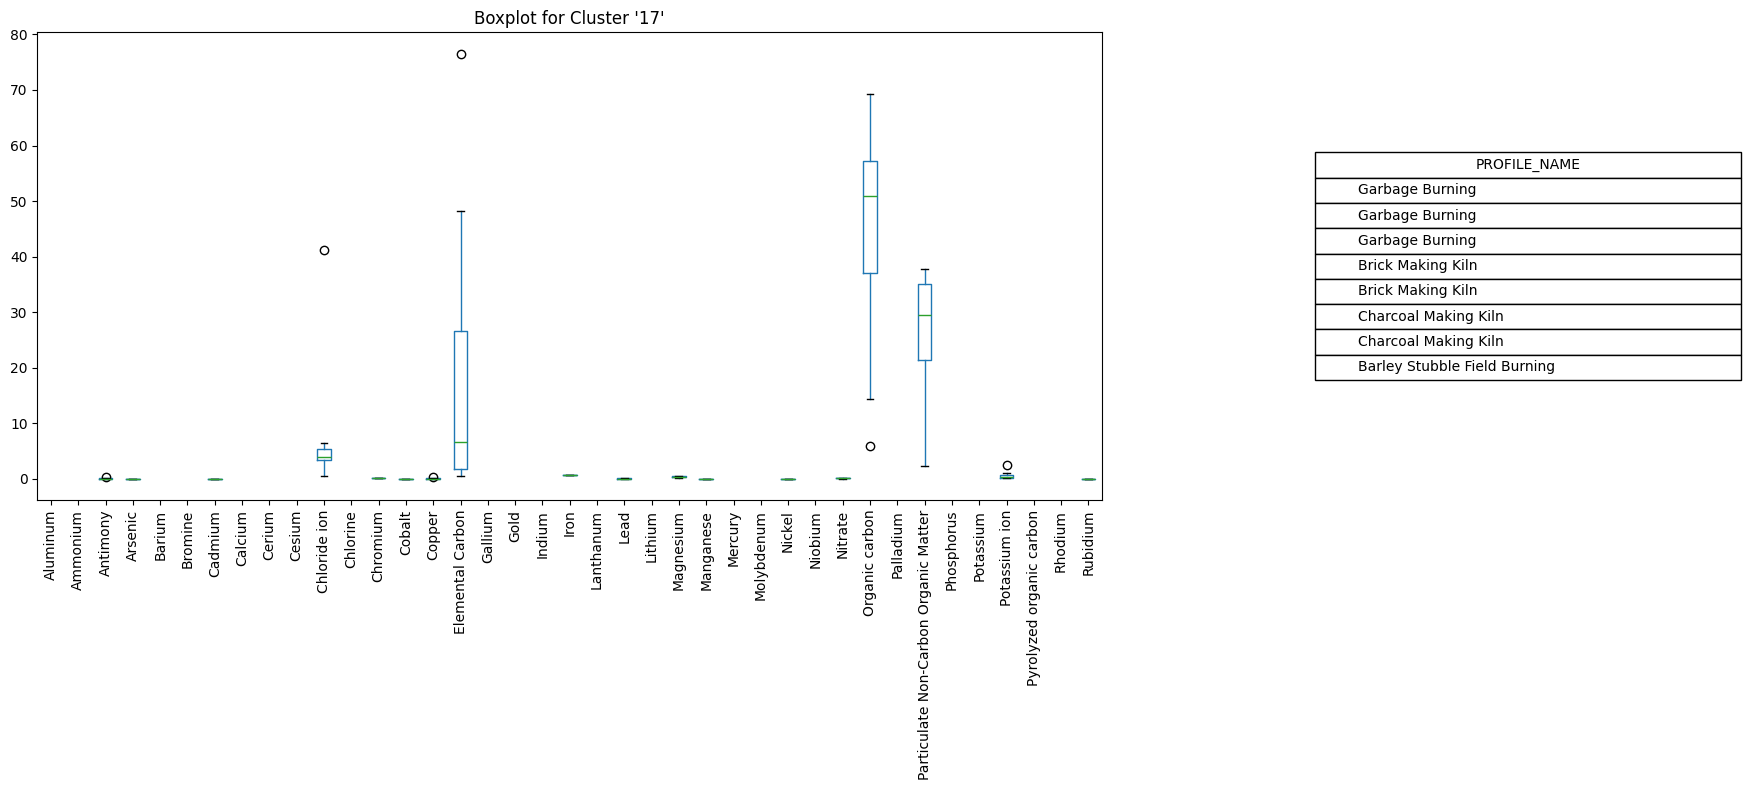

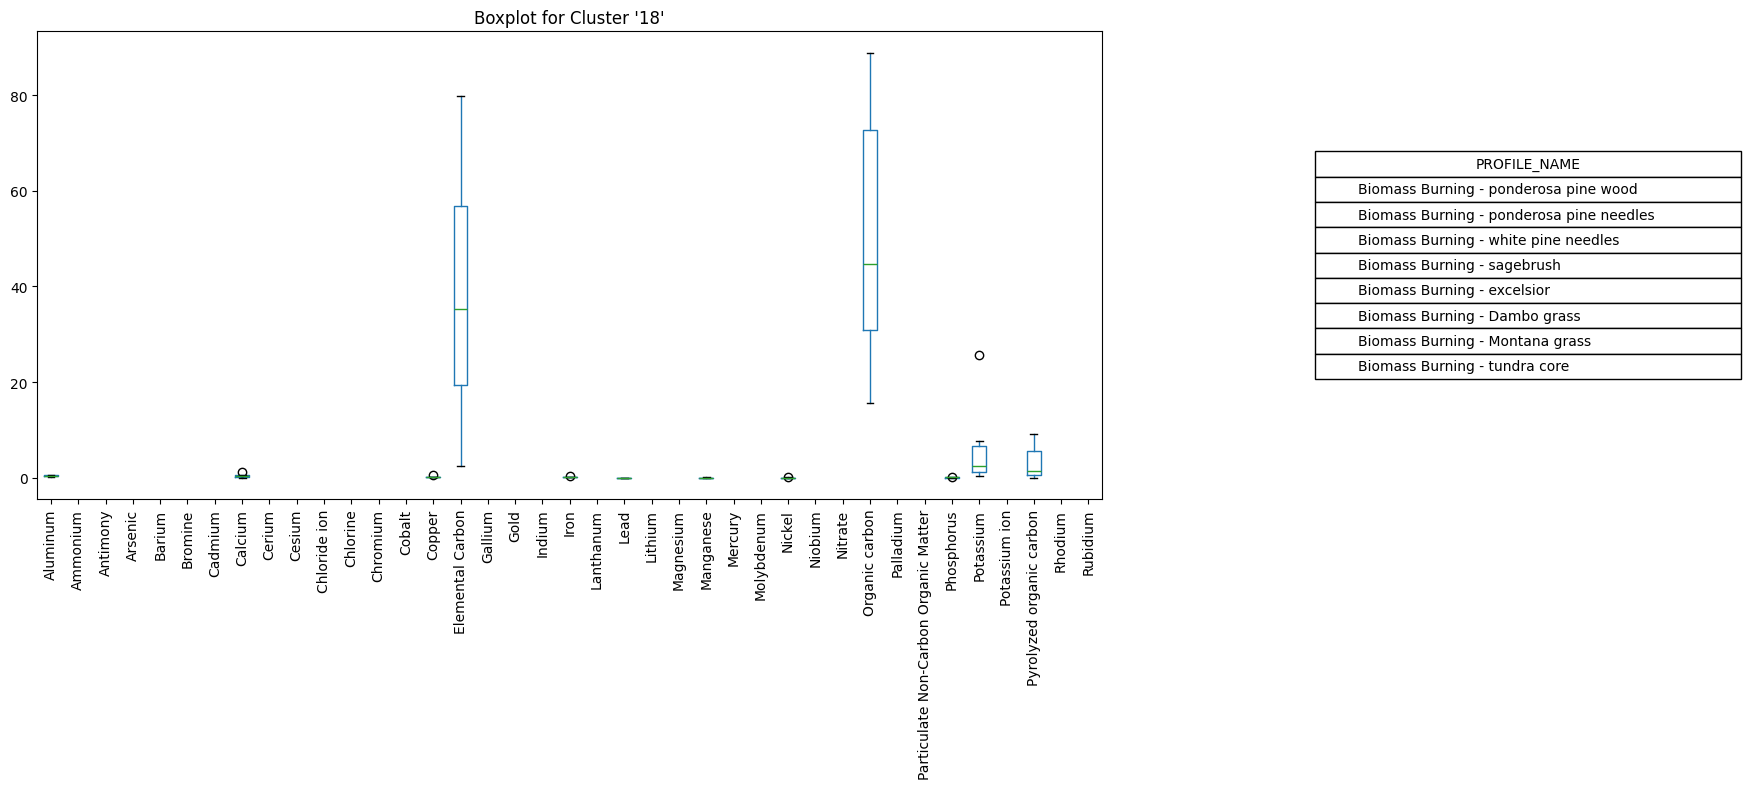

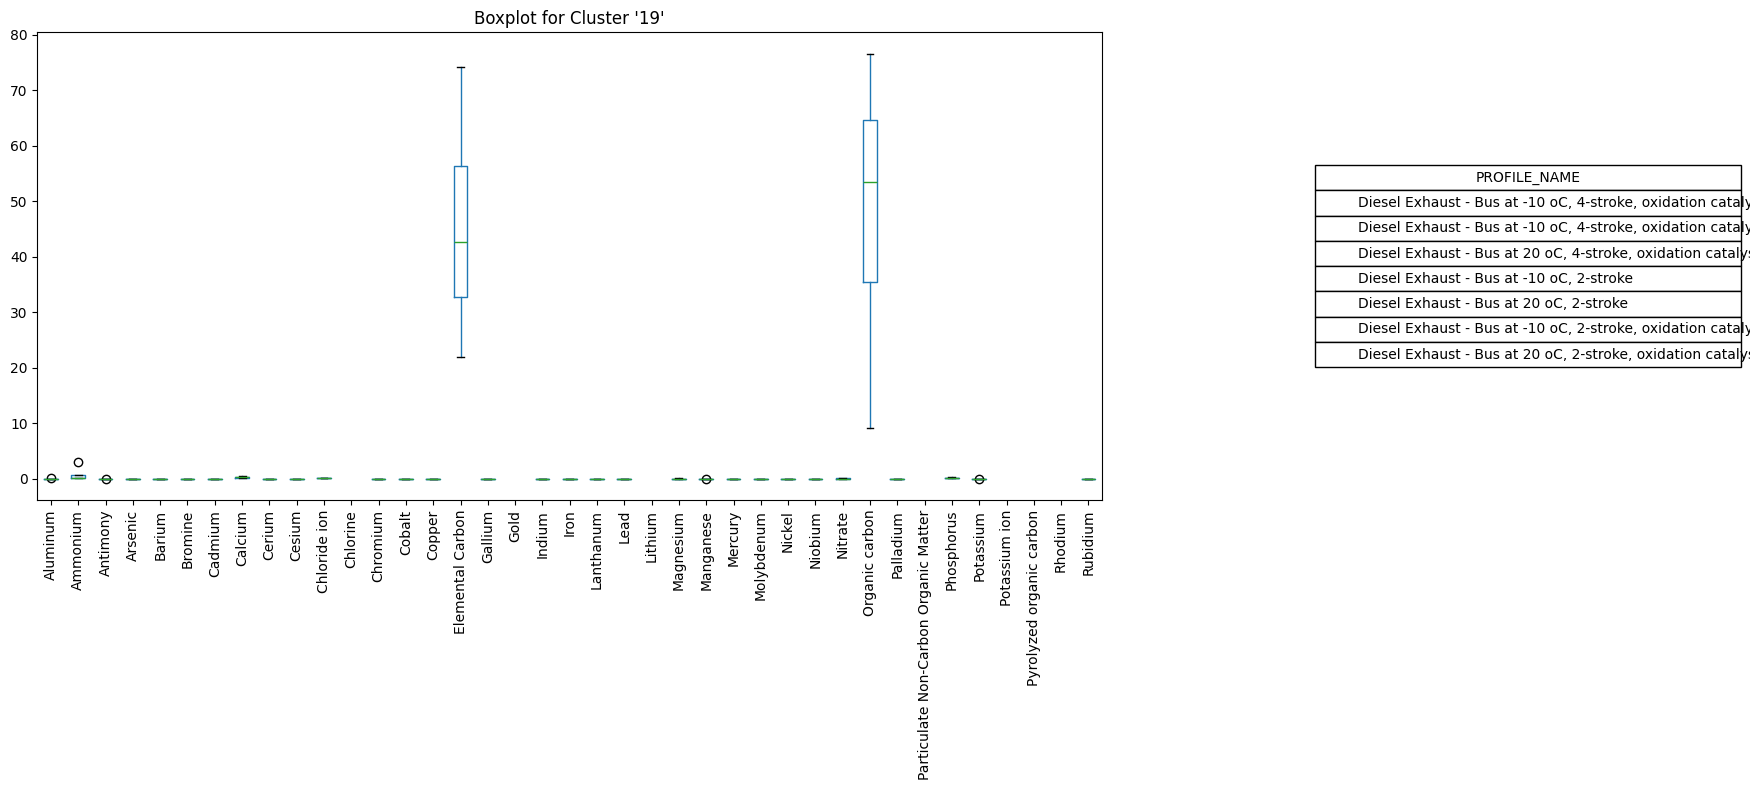

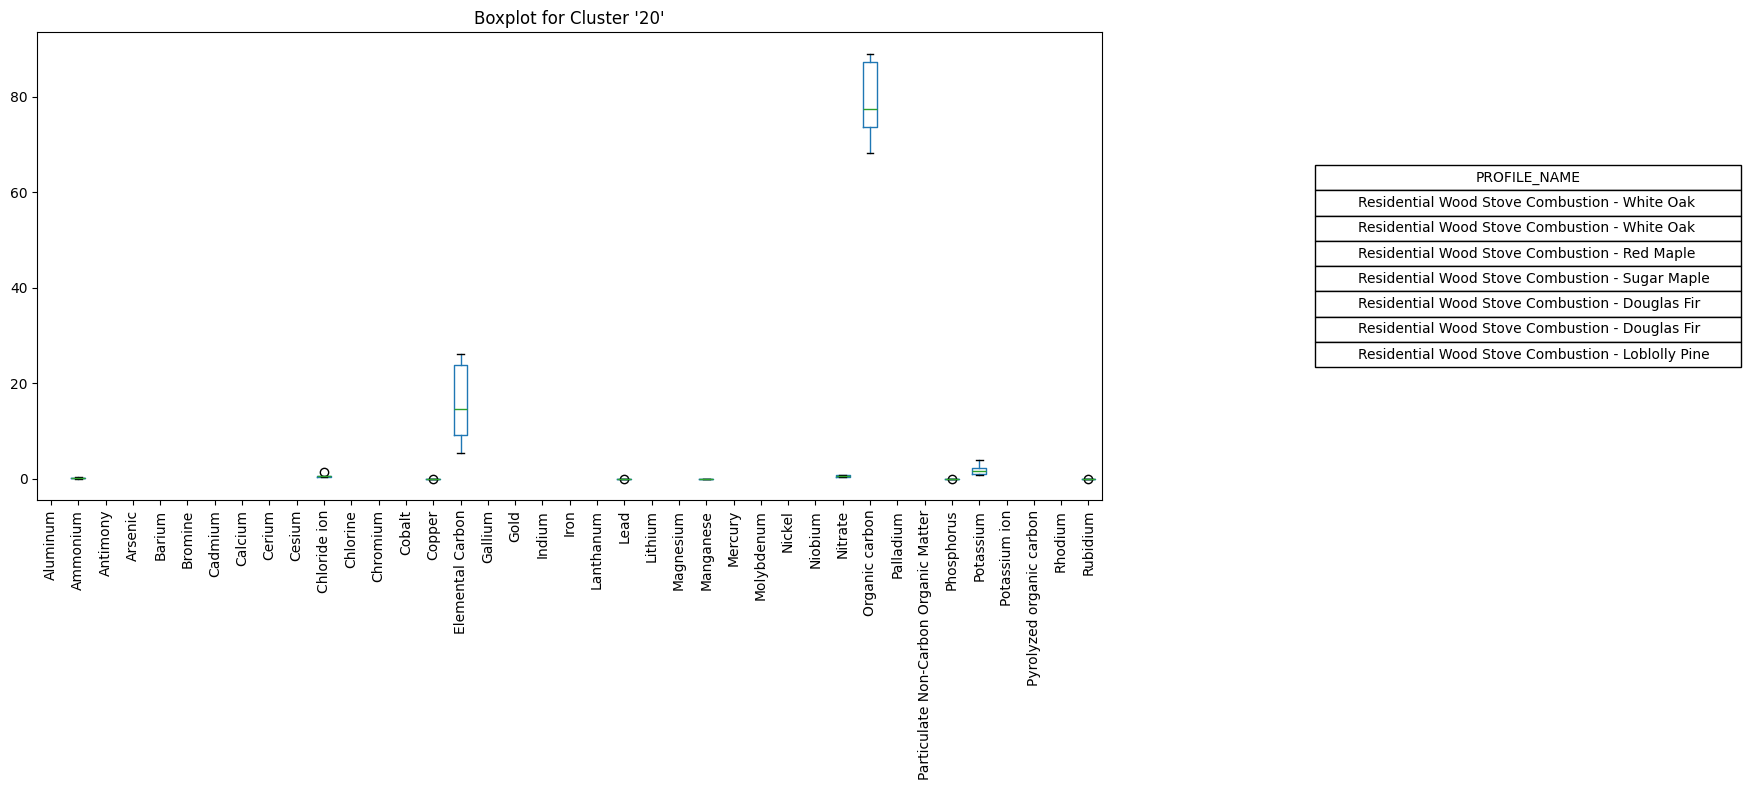

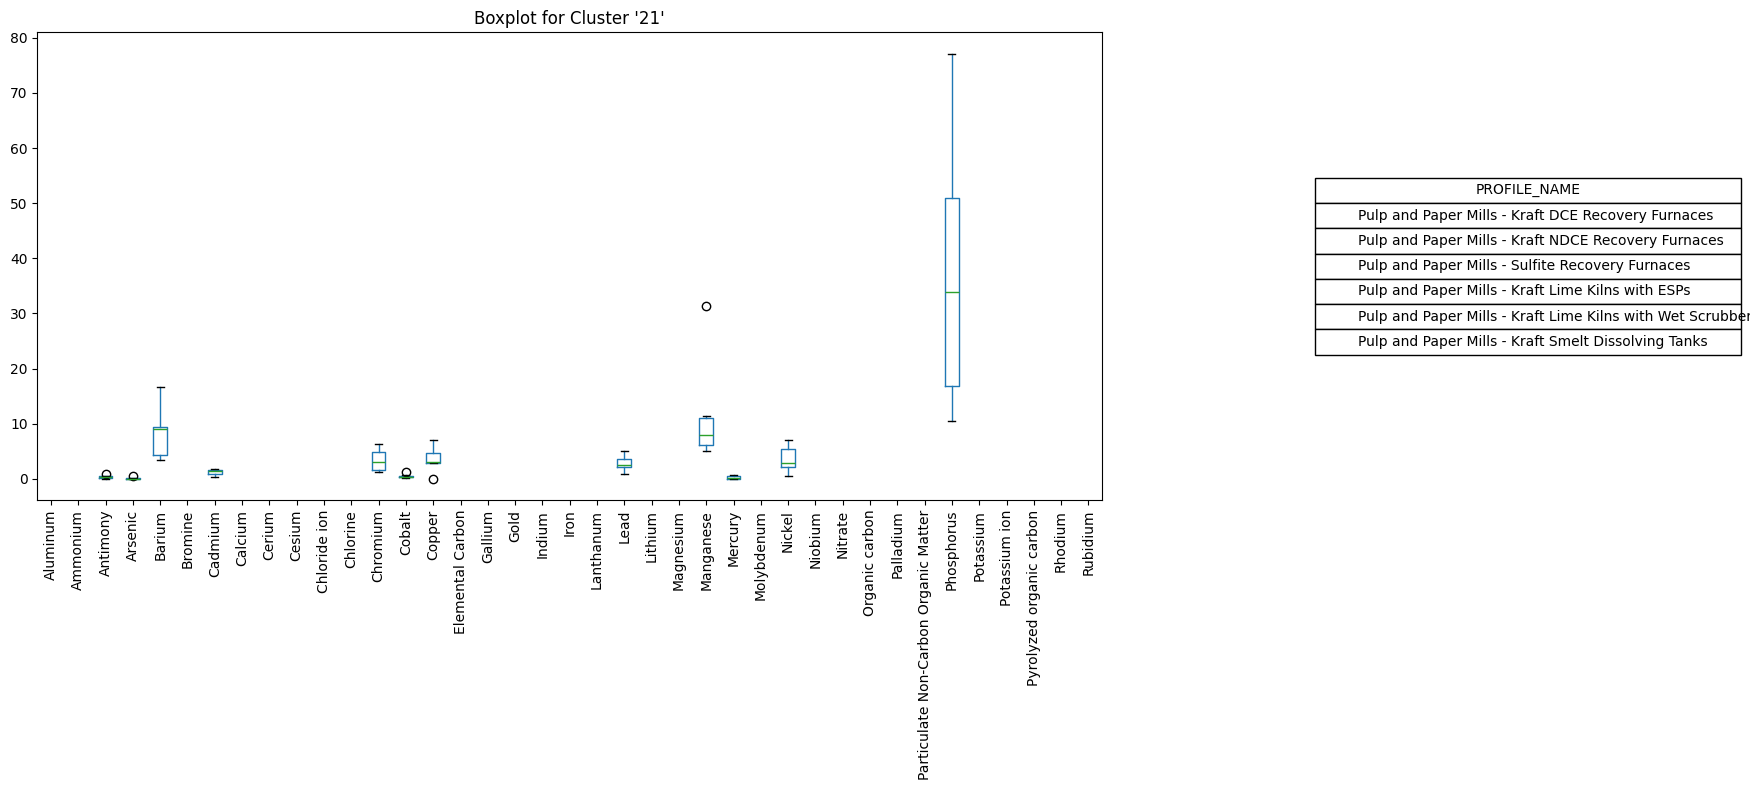

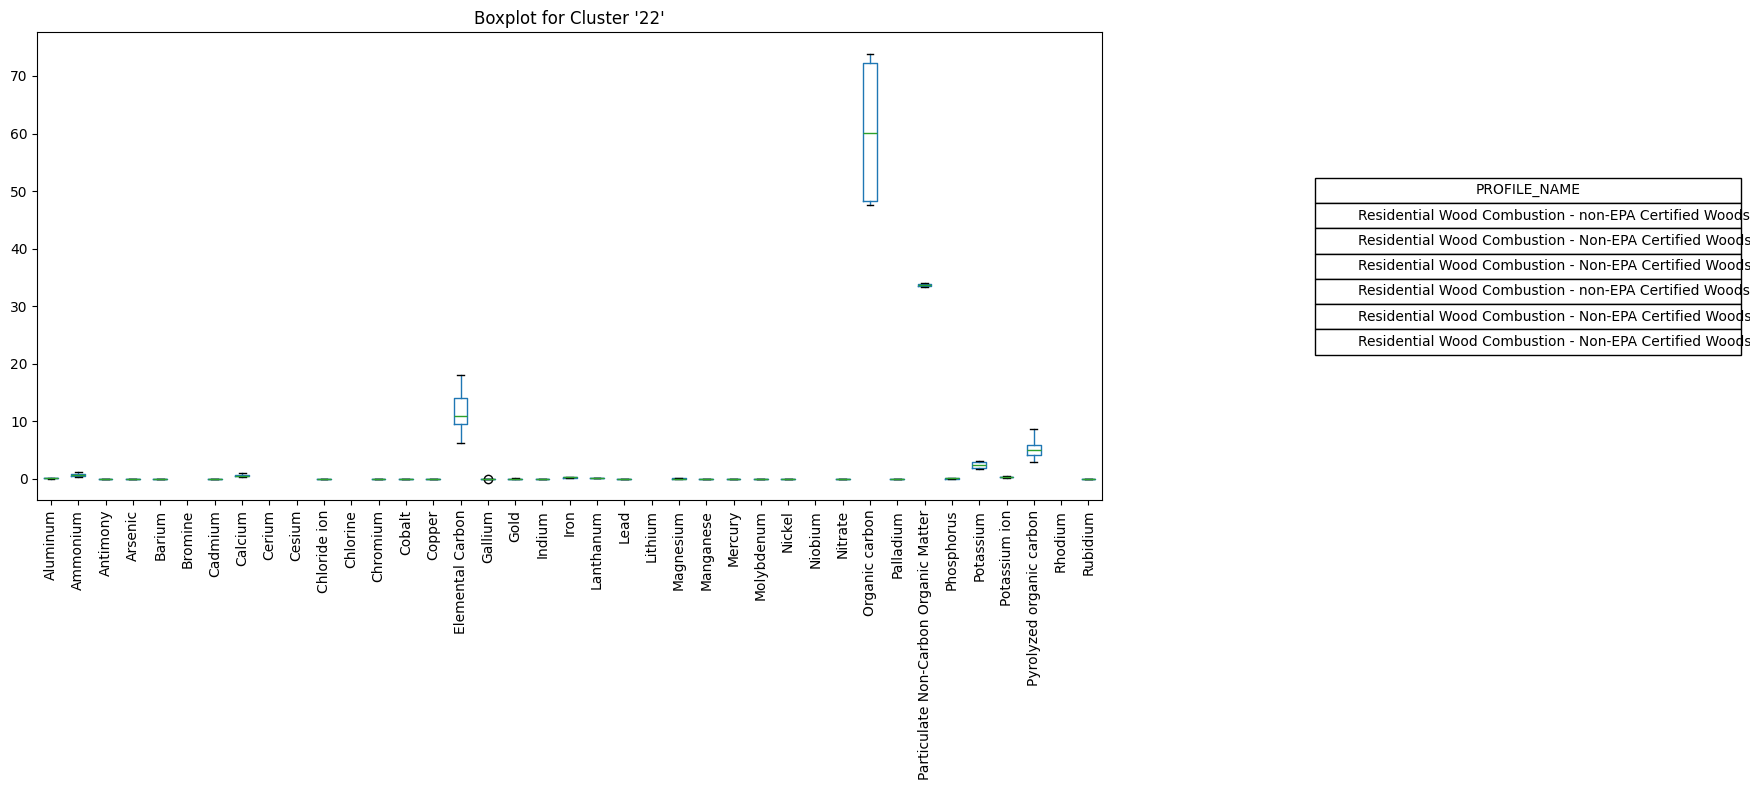

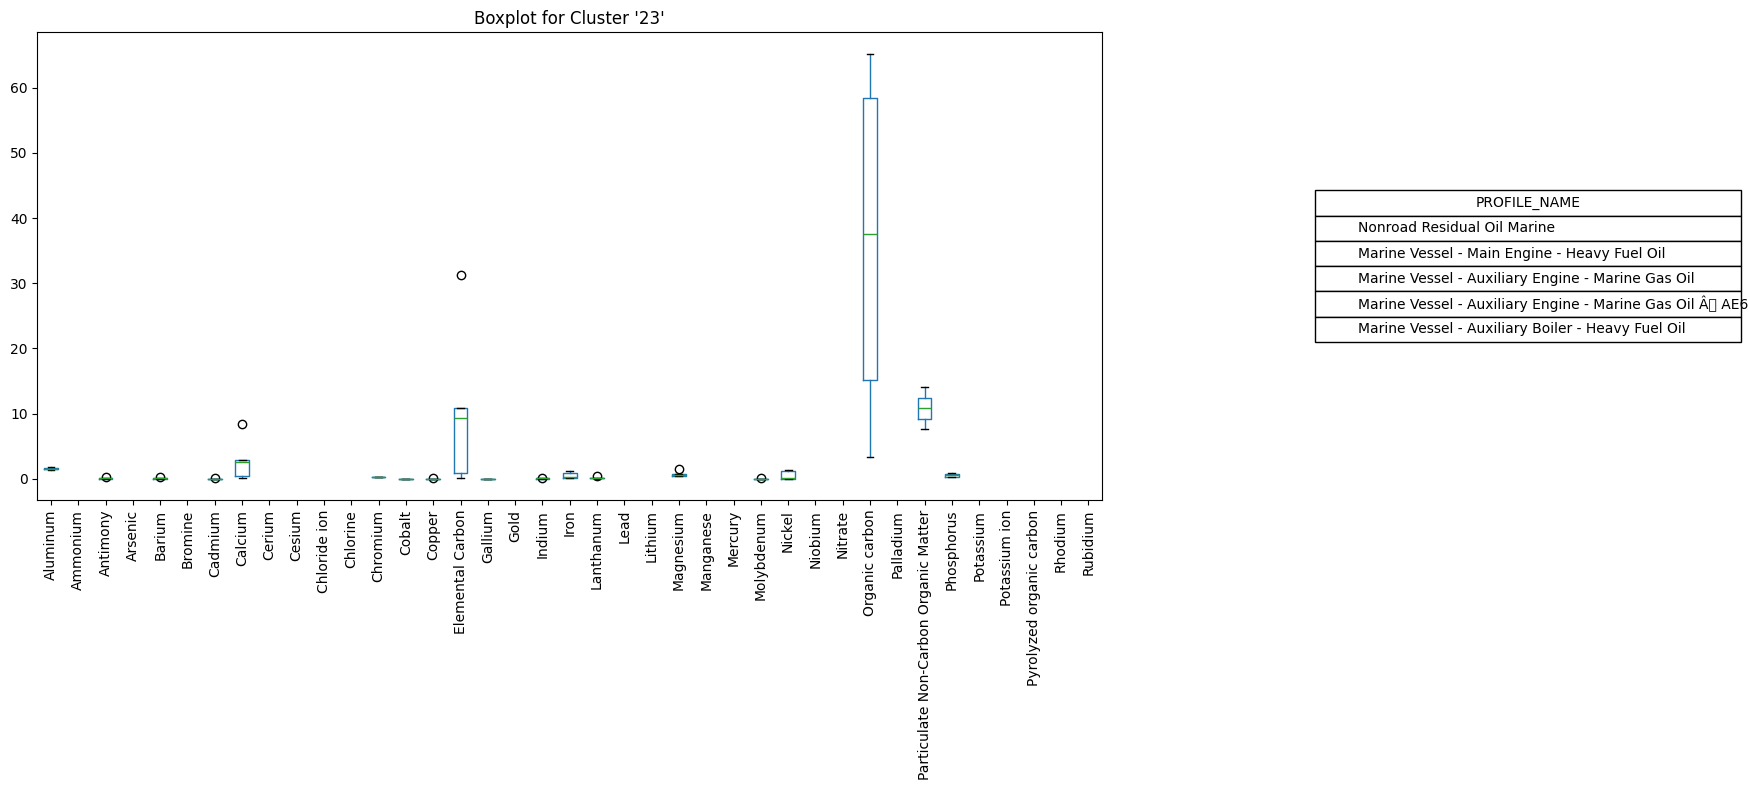

In [172]:
for i, cluster in enumerate(coms.communities):
    selected_rows = df.loc[cluster]

    fig, ax = plt.subplots(figsize=(18, 8))
    selected_rows.iloc[:, 2:45].boxplot(ax=ax, grid=False)
    ax.grid(False)
    #plt.yscale('log') # saikat
    plt.title(f"Boxplot for Cluster '{i}'")
    plt.xticks(rotation=90)  # Rotate x-labels if needed

    # Create a divider for the existing axes instance
    divider = make_axes_locatable(ax)
    ax_table = divider.append_axes("right", size="20%", pad=0.00)

    # Hide the axes for the table
    ax_table.axis('off')

    # Create the table
    table_data = selected_rows[['PROFILE_NAME']]# selected_rows[['Saritha_Saikat_Assigned']]
    table = ax_table.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='left', loc='right')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(2, 2)
    plt.tight_layout()
    #fig.savefig(f'plot_{i+1}.png')
    plt.plot()
    #plt.close()

In [132]:
k_species = 10


for i, cluster in enumerate(coms.communities):

    selected_rows = df.loc[cluster]

    selected_columns = selected_rows.iloc[:,6:57+6]



    U, S, Vt = np.linalg.svd(selected_columns, full_matrices=False)


    column_importance = np.sum(np.matmul(np.diag(S),Vt**2), axis=0)

    important_columns_indices = np.argsort(-column_importance)[:k_species]

    important_columns = selected_columns.columns[important_columns_indices]

    print(important_columns)
    column_importance_per = column_importance/np.sum(column_importance)*100
    #print(np.sort(column_importance_per)[::-1])

    print(selected_rows[important_columns].describe())

    fig, ax = plt.subplots(figsize=(18, 8))
    ax.boxplot(selected_rows[important_columns])


    ax.grid(False)
    ax.set_xticklabels(important_columns, rotation=90)
    #plt.yscale("log")
    plt.title(f"Boxplot for key species in cluster '{i}'")
    plt.xticks(rotation=90)  # Rotate x-labels if needed

    # Create a divider for the existing axes instance
    divider = make_axes_locatable(ax)
    ax_table = divider.append_axes("right", size="20%", pad=0.0)

    # Hide the axes for the table
    ax_table.axis('off')

    # Create the table
    table_data = selected_rows[['PROFILE_NAME']]
    table = ax_table.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='left', loc='right')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(2, 2)
    plt.tight_layout()
    fig.savefig(f'plot_{i+1}.png')
    plt.show()

LinAlgError: SVD did not converge

In [ ]:
selected_rows


SPECIES_NAME PROFILE_CODE                              PROFILE_NAME  Aluminum  \
146                 95514       Coal Combustion - Prater Creek Coal   11.8994   
147                 95515  Coal Combustion - Prater Creek w/biomass    0.0000   
148                 95516      Coal Combustion - Black Thunder Coal    0.0000   
149                 95517        Coal Combustion - Bailey Mine Coal    0.0000   

SPECIES_NAME  Ammonium  Antimony  Arsenic  Bromine  Cadmium  Calcium  \
146            1.30030       0.0  0.01928      0.0  0.00000  0.37622   
147            0.10058       0.0  0.01303      0.0  0.00046  1.43590   
148            0.01904       0.0  0.00454      0.0  0.00028  2.88210   
149            3.77660       0.0  0.00951      0.0  0.00000  0.52095   

SPECIES_NAME  Calcium ion  ...  Silicon   Sodium  Sodium ion  Sulfate  Sulfur  \
146                   0.0  ...      0.0  0.04740         0.0   5.0780     0.0   
147                   0.0  ...      0.0  0.16318         0.0   2.8749     0.0   
148                   0.0  ...      0.0  0.15797         0.0   3.5381     0.0   
149                   0.0  ...      0.0  0.05867         0.0  36.1690     0.0   

SPECIES_NAME  Tin  Titanium  Vanadium     Zinc  Zirconium  
146           0.0       0.0   0.04604  0.02446        0.0  
147           0.0       0.0   0.03742  0.03043        0.0  
148           0.0       0.0   0.03122  0.01595        0.0  
149           0.0       0.0   0.02619  0.01250        0.0  

[4 rows x 41 columns]

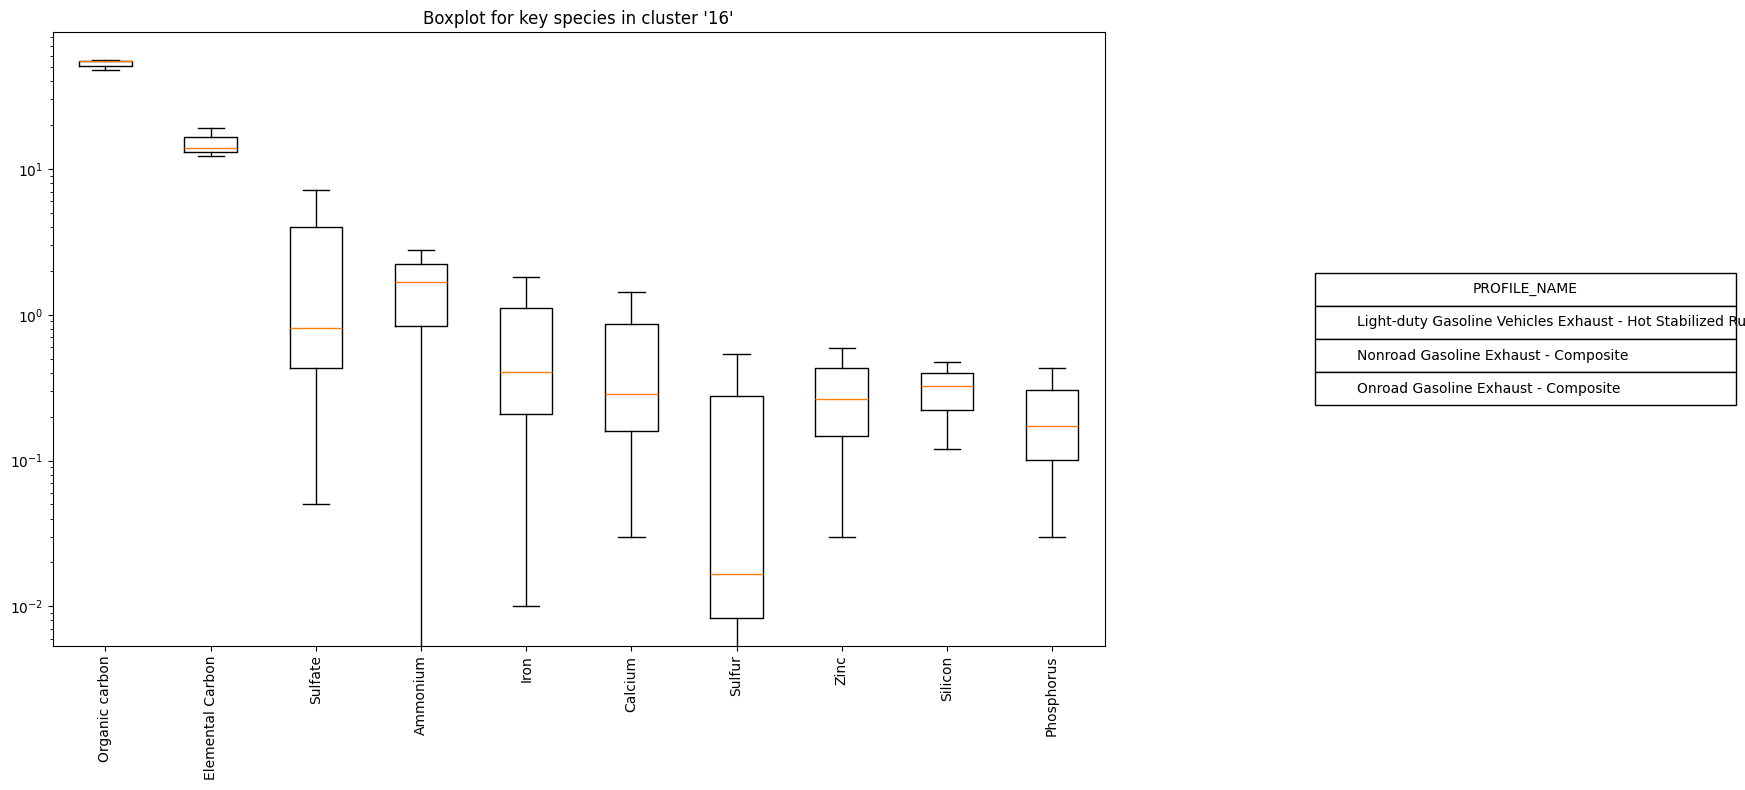

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

k_species = 10
# Subset the DataFrame based on the value of the second column (index=1)
conditions = (pivot_df['PROFILE_CODE'] == '8993') | (pivot_df['PROFILE_CODE'] == '91113') | (pivot_df['PROFILE_CODE'] == '91122')
selected_rows = pivot_df[conditions]
selected_columns = selected_rows.iloc[:,2:45]
# Create a boxplot for all columns except the first two
#subset_df.iloc[:, 3:].boxplot()
U, S, Vt = np.linalg.svd(selected_columns, full_matrices=False)
column_importance = np.sum(Vt**2, axis=0)
important_columns_indices = np.argsort(-column_importance)[:k_species]
important_columns = selected_columns.columns[important_columns_indices]
fig, ax = plt.subplots(figsize=(18, 8))
ax.boxplot(selected_rows[important_columns])
ax.grid(False)
ax.set_xticklabels(important_columns, rotation=90)
plt.yscale('log')
plt.title(f"Boxplot for key species in cluster '{i}'")
plt.xticks(rotation=90)  # Rotate x-labels if needed

# Create a divider for the existing axes instance
divider = make_axes_locatable(ax)
ax_table = divider.append_axes("right", size="20%", pad=0.0)

# Hide the axes for the table
ax_table.axis('off')

# Create the table
table_data = selected_rows[['PROFILE_NAME']]
table = ax_table.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='left', loc='right')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2, 2)
plt.tight_layout()
#fig.savefig(f'plot_{i+1}.png')
plt.show()
#95125a


In [ ]:
pivot_df

SPECIES_NAME PROFILE_CODE                                       PROFILE_NAME  \
0                 3766AE6                                  Forest Fire - AE6   
1                    5674       Marine Vessel - Main Engine - Heavy Fuel Oil   
2                 5675AE6  Marine Vessel - Auxiliary Engine - Marine Gas ...   
3                 8873AE6                                   Aircraft Exhaust   
4                   8898a  Outdoor Hydronic Heater- one stage updraft con...   
..                    ...                                                ...   
214                 95870         Catalytic Woodstove Startup Wood Composite   
215                 95871     Catalytic Woodstove Burn Phase Composite Birch   
216                 95872    Catalytic Woodstove Burn Phase Composite Spruce   
217                 95873  Catalytic Woodstove Burn Phase and Wood Composite   
218                SUGP02              Sugar Cane Pre-Harvest Burning Mexico   

SPECIES_NAME  Aluminum  Ammonium  Antimony   Arsenic  Bromine   Cadmium  \
0             0.015400  0.110500  0.000500  0.000300      0.0  0.000100   
1             0.771625  0.000000  0.019000  0.000000      0.0  0.003958   
2             0.000000  0.000000  0.061466  0.000000      0.0  0.023641   
3             0.000000  1.791897  0.000000  0.000000      0.0  0.000000   
4             0.000000  0.000000  0.000000  0.000000      0.0  0.000000   
..                 ...       ...       ...       ...      ...       ...   
214           0.000000  0.000000  0.001704  0.000111      0.0  0.006554   
215           0.000000  0.000000  0.010937  0.000005      0.0  0.006001   
216           0.000355  0.000000  0.000725  0.000006      0.0  0.002385   
217           0.000149  0.000000  0.006648  0.000006      0.0  0.004483   
218           0.000000  2.184874  0.000000  0.000000      0.0  0.000000   

SPECIES_NAME   Calcium  Calcium ion  ...   Silicon    Sodium  Sodium ion  \
0             0.369300          0.0  ...  0.062000  0.012200         0.0   
1             0.259125          0.0  ...  0.000000  0.000000         0.0   
2             1.912530          0.0  ...  0.340426  0.000000         0.0   
3             0.000000          0.0  ...  0.000000  0.000000         0.0   
4             0.000000          0.0  ...  0.017300  0.010700         0.0   
..                 ...          ...  ...       ...       ...         ...   
214           0.056238          0.0  ...  0.026435  0.045670         0.0   
215           0.024024          0.0  ...  0.101690  0.021691         0.0   
216           0.043209          0.0  ...  0.001333  0.003175         0.0   
217           0.032082          0.0  ...  0.059540  0.013915         0.0   
218           0.000000          0.0  ...  0.000000  0.168067         0.0   

SPECIES_NAME    Sulfate  Sulfur       Tin  Titanium  Vanadium      Zinc  \
0              0.133200  0.0792  0.001500  0.001500  0.000100  0.002900   
1             38.032500  0.0000  0.013281  0.005000  1.515625  0.018250   
2             12.078014  0.0000  0.035461  0.014184  0.082742  0.200946   
3              6.867400  0.0000  0.000000  0.000000  0.000000  0.000000   
4              0.044100  0.0147  0.000000  0.000000  0.000000  0.007760   
..                  ...     ...       ...       ...       ...       ...   
214            0.417652  0.0000  0.010290  0.001487  0.000154  0.045448   
215            1.906428  0.0000  0.008238  0.000061  0.000311  0.183862   
216            0.359246  0.0000  0.001160  0.000393  0.000060  0.032112   
217            1.256611  0.0000  0.005265  0.000200  0.000206  0.120127   
218            3.361345  0.0000  0.000000  0.000000  0.000000  0.000000   

SPECIES_NAME  Zirconium  
0              0.000000  
1              0.000000  
2              0.000000  
3              0.000000  
4              0.000000  
..                  ...  
214            0.000927  
215            0.000196  
216            0.000267  
217            0.000226  
218            0.000000  

[219 rows x